In [1097]:
# Raw Package
import numpy as np
import pandas as pd
import warnings

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# for web crawling 
import pandas_datareader.data as web
import datetime

# import ols
from statsmodels.formula.api import ols
from statsmodels.formula.api import gls
import statsmodels as sm

# AD Fuller test
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ARIMA
import statsmodels.api as sm
from stargazer.stargazer import Stargazer


## Exchange Rate Scrapping

In [1098]:
# target web to crawl 
target = "xxxx"
# Define the time period
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2023, 3, 1)
warnings.filterwarnings("ignore")

In [1099]:
# get EURO-US exchange rate data from 2000-01-01 to 2022-1-1

df_eu = yf.download('EURUSD=X', start=start_date, end=end_date, progress=False)
df_eu = df_eu.reset_index()
df_eu = df_eu[['Date', 'Close']]
df_eu.columns = ['Date', 'EURUSD']

# change the frequency of the data to monthly
df_eu = df_eu.set_index('Date')
df_eu = df_eu.resample('M').mean()
df_eu = df_eu.reset_index()

# get rid of the days in the date column
df_eu['Date'] = df_eu['Date'].dt.strftime('%Y-%m')
# rename Date to date
df_eu = df_eu.rename(columns={'Date': 'date'})
df_eu.tail()


date    EURUSD
226  2022-10  0.983970
227  2022-11  1.018547
228  2022-12  1.058271
229  2023-01  1.077561
230  2023-02  1.071893

In [1100]:
# get AUD-US exchange rate data from 2000-01-01 to 2022-1-1

df_aud = yf.download('AUDUSD=X', start=start_date, end=end_date, progress=False)
df_aud = df_aud.reset_index()
df_aud = df_aud[['Date', 'Close']]
df_aud.columns = ['Date', 'AUDUSD']

# change the frequency of the data to monthly
df_aud = df_aud.set_index('Date')
df_aud = df_aud.resample('M').mean()
df_aud = df_aud.reset_index()

# get rid of the days in the date column
df_aud['Date'] = df_aud['Date'].dt.strftime('%Y-%m')
# rename Date to date
df_aud.columns = ['date', 'AUDUSD']
df_aud.head()


date    AUDUSD
0  2006-05  0.758151
1  2006-06  0.739926
2  2006-07  0.752416
3  2006-08  0.763157
4  2006-09  0.755768

In [1101]:
# get argentina-US exchange rate data from 2000-01-01 to 2022-1-1

df_ars = yf.download('ARS=X',start=start_date, end=end_date, progress=False)
df_ars = df_ars.reset_index()
df_ars = df_ars[['Date', 'Close']]
df_ars.columns = ['Date', 'ARSUSD']

# change the frequency of the data to monthly
df_ars = df_ars.set_index('Date')
df_ars = df_ars.resample('M').mean()
df_ars = df_ars.reset_index()

# get rid of the days in the date column
df_ars['Date'] = df_ars['Date'].dt.strftime('%Y-%m')
# rename Date to date
df_ars = df_ars.rename(columns={'Date': 'date'})
df_ars.head()


date    ARSUSD
0  2001-07  0.998775
1  2001-08  0.998737
2  2001-09  0.998450
3  2001-10       NaN
4  2001-11       NaN

In [1102]:
# get japan-US exchange rate data from 2000-01-01 to 2022-1-1

df_jpy = yf.download('JPY=X', start=start_date, end=end_date, progress=False)
df_jpy = df_jpy.reset_index()
df_jpy = df_jpy[['Date', 'Close']]
df_jpy.columns = ['Date', 'JPYUSD']

# change the frequency of the data to monthly
df_jpy = df_jpy.set_index('Date')
df_jpy = df_jpy.resample('M').mean()
df_jpy = df_jpy.reset_index()

# get rid of the days in the date column
df_jpy['Date'] = df_jpy['Date'].dt.strftime('%Y-%m')
# rename Date to date
df_jpy = df_jpy.rename(columns={'Date': 'date'})
df_jpy.head()

date      JPYUSD
0  2000-01  105.260000
1  2000-02  109.451429
2  2000-03  106.342174
3  2000-04  105.641000
4  2000-05  108.126522

In [1103]:
# get China-US exchange rate data from 2000-01-01 to 2022-1-1
df = yf.download("CNY=X",start=start_date, end=end_date)
df = df.reset_index()
df = df.rename(columns={"Date": "date", "Close": "cny_usd"})
df.head()

# change the frequency of the data from daily to monthly
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()
# change to monthly frequency, only include the month not the day
df = df.resample('M').mean()
df = df.reset_index()
df.head()

# get rid of the day in the date column
df['date'] = df['date'].dt.strftime('%Y-%m')
#only keep close price
df_china = df[['date', 'cny_usd']]
# rename the cny_usd column to CNYUSD
df_china = df_china.rename(columns={'cny_usd': 'CNYUSD'})


df_china.head()


[*********************100%***********************]  1 of 1 completed


date    CNYUSD
0  2001-06  8.276800
1  2001-07  8.276814
2  2001-08  8.276969
3  2001-09  8.276850
4  2001-10  8.276842

In [1104]:
# pound sterling-US exchange rate data from 2000-01-01 to 2022-1-1

df_gbp = yf.download('GBPUSD=X', start=start_date, end=end_date, progress=False)
df_gbp = df_gbp.reset_index()
df_gbp = df_gbp[['Date', 'Close']]
df_gbp.columns = ['Date', 'GBPUSD']

# change the frequency of the data to monthly
df_gbp = df_gbp.set_index('Date')
df_gbp = df_gbp.resample('M').mean()
df_gbp = df_gbp.reset_index()

# get rid of the days in the date column
df_gbp['Date'] = df_gbp['Date'].dt.strftime('%Y-%m')
# rename Date to date
df_gbp = df_gbp.rename(columns={'Date': 'date'})
df_gbp.head()


date    GBPUSD
0  2003-12  1.753903
1  2004-01  1.821047
2  2004-02  1.869247
3  2004-03  1.828007
4  2004-04  1.804626

## Variables of Interest

### Trade Balance

In [1105]:
# Get the trade balance data for the US
df_trade = web.DataReader('BOPGSTB', 'fred', start_date, end_date)
# get rid of the day in the date column
df_trade['date'] = df_trade.index.strftime('%Y-%m')
df_trade = df_trade.reset_index(drop=True)
df_trade.head()
# rename the column
df_trade = df_trade.rename(columns={'BOPGSTB': 'trade_bal'})

### Interest Rate

In [1106]:
# Get the interest rate data for the US
df_interest = web.DataReader('DFF', 'fred', start_date, end_date)
# get rid of the day in the date column
df_interest['date'] = df_interest.index.strftime('%Y-%m')
df_interest = df_interest.reset_index(drop=True)
df_interest.tail()


DFF     date
8456  4.58  2023-02
8457  4.58  2023-02
8458  4.57  2023-02
8459  4.57  2023-02
8460  4.58  2023-03

### Output

In [1107]:
# get the real gdp data for the US
df_gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
# get rid of the day in the date column
df_gdp['date'] = df_gdp.index.strftime('%Y-%m')
df_gdp = df_gdp.reset_index(drop=True)
df_gdp.head()


GDPC1     date
0  12935.252  2000-01
1  13170.749  2000-04
2  13183.890  2000-07
3  13262.250  2000-10
4  13219.251  2001-01

### Sentiments

In [1108]:
# Get the trade balance data for the US
df_sentiment  = web.DataReader('UMCSENT', 'fred', start_date, end_date)
# get rid of the day in the date column
df_sentiment['DATE'] = df_sentiment.index.strftime('%Y-%m')
df_sentiment = df_sentiment.reset_index(drop=True)
# rename Date to date
df_sentiment = df_sentiment.rename(columns={'DATE': 'date'})
df_sentiment.head()

UMCSENT     date
0    112.0  2000-01
1    111.3  2000-02
2    107.1  2000-03
3    109.2  2000-04
4    110.7  2000-05

In [1109]:
# merge the two dataframes
df_final = pd.merge(df_sentiment, df_china, how='left', left_on="date", right_on='date')
df_final = pd.merge(df_final, df_eu, how='left', left_on="date", right_on='date')
df_final = pd.merge(df_trade, df_final, how='left', left_on="date", right_on='date')
# merge the third dataframe
#df_final = pd.merge(df_final, df_eu, how='right', left_on="DATE", right_on='Date')
# change eursd to 1/eurusd
#df_final['EURUSD'] = 1/df_final['EURUSD']
df_final.tail()

trade_bal     date  UMCSENT    CNYUSD    EURUSD
272   -72638.0  2022-09     58.6  7.005973  0.991166
273   -77161.0  2022-10     59.9  7.182876  0.983970
274   -60646.0  2022-11     56.8  7.181300  1.018547
275   -67210.0  2022-12     59.7  6.980082  1.058271
276   -68289.0  2023-01     64.9  6.797468  1.077561

## Simple OLS

In [1110]:
# analyze the data
df_final.describe()
model = ols("CNYUSD ~ UMCSENT", data=df_final).fit()
# print the model result nicely
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 CNYUSD   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     20.13
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.10e-05
Time:                        21:08:13   Log-Likelihood:                -272.05
No. Observations:                 253   AIC:                             548.1
Df Residuals:                     251   BIC:                             555.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6848      0.301     18.909      0.0

In [1111]:
# now for EURUSD
# corr = df_final["EURUSD"].corr(df_final["gdp_growth"])
model = ols("EURUSD ~ UMCSENT", data=df_final).fit()
# print the model result nicely
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 EURUSD   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     36.50
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           6.16e-09
Time:                        21:08:13   Log-Likelihood:                 169.22
No. Observations:                 230   AIC:                            -334.4
Df Residuals:                     228   BIC:                            -327.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5420      0.050     31.008      0.0

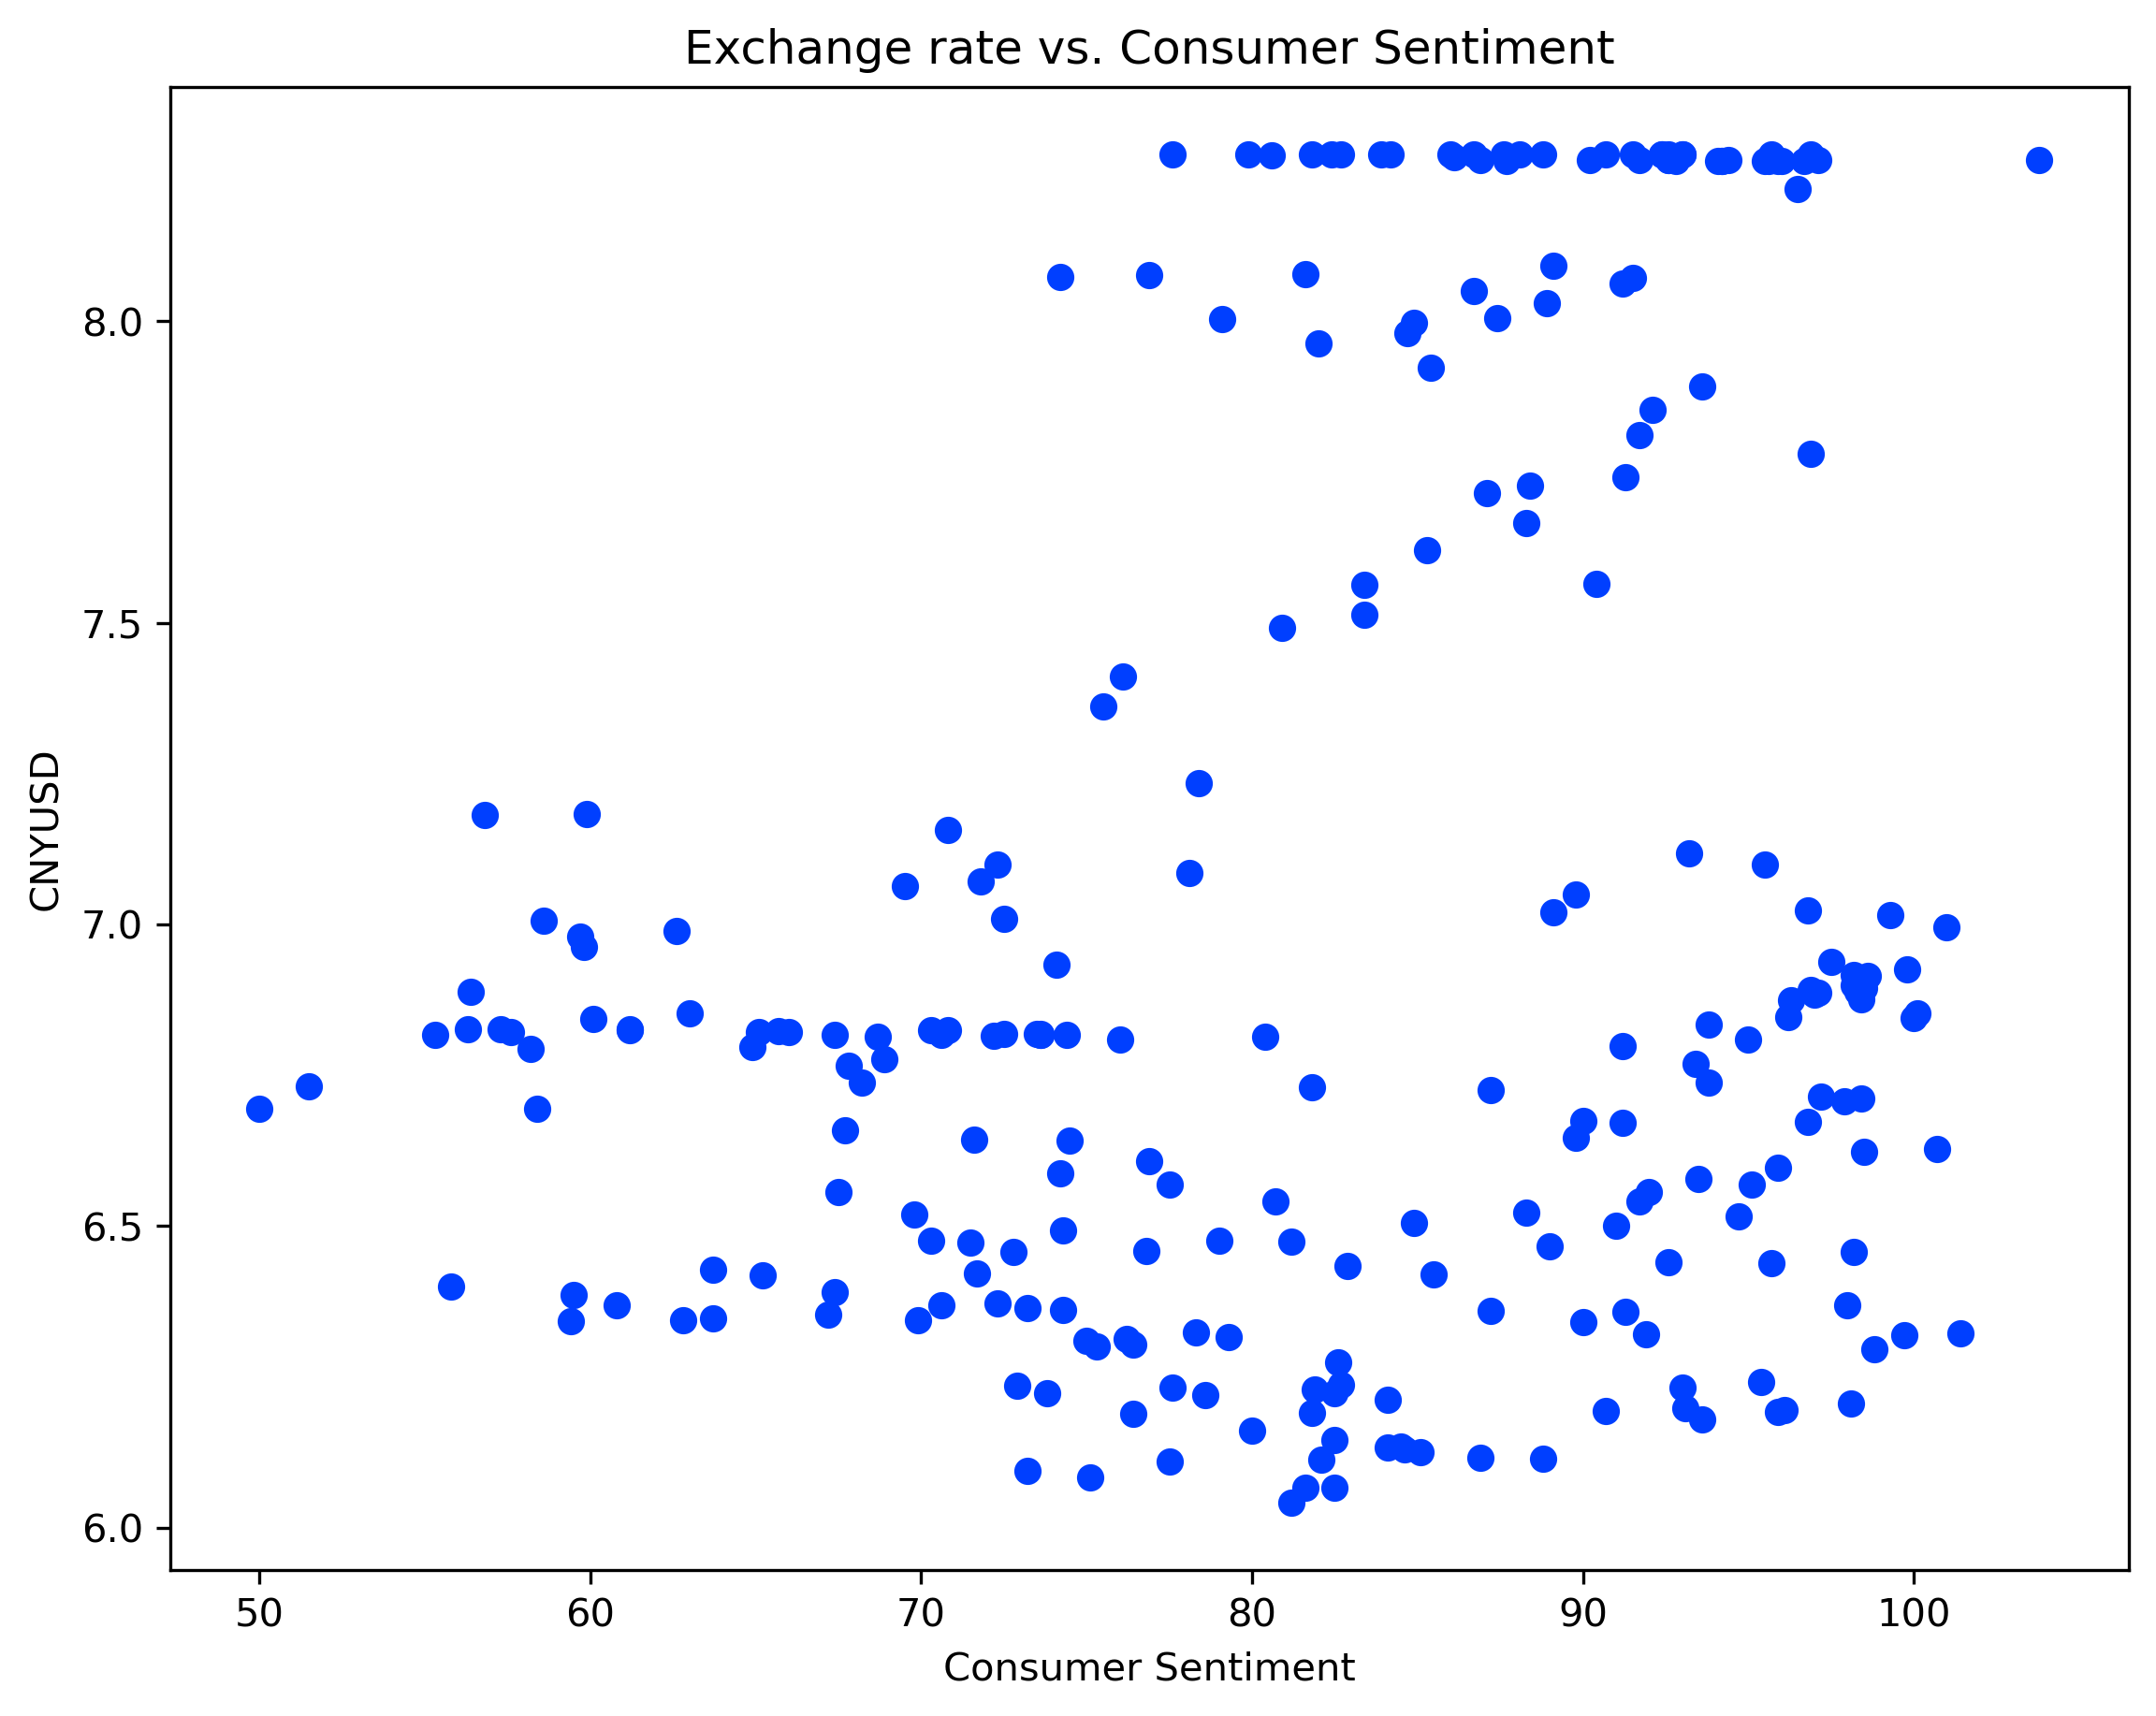

In [1112]:
# visualize the data
# use a graph object
plt.scatter(df_final["UMCSENT"], df_final["CNYUSD"])
plt.title("Exchange rate vs. Consumer Sentiment")
plt.xlabel("Consumer Sentiment")
plt.ylabel("CNYUSD")

# resize the graph
plt.rcParams["figure.figsize"] = (10, 5)



## SUR Model Data Preparation 

In [1113]:
# merge df_china and df_eu
df_sur1 = pd.merge(df_china, df_eu, how='left', left_on="date", right_on='date')

In [1114]:
# add a column callded china to df_china
df_china['country'] = "China"
# add a column called euro to df_eu
df_eu['country'] = "Europe"
# renaqme Date to date
df_eu = df_eu.rename(columns={'Date': 'DATE'})
# merge df_UMCSENT and df_eu, on date
df_sur2 = pd.concat([df_china, df_eu], axis=0)
# create a column called value, which is the value of the exchange rate of the country
# fill na of EURUSD with CNYUSD if the country is China
df_sur2['value'] = np.where(df_sur2['country'] == "China", df_sur2['CNYUSD'], df_sur2['EURUSD'])
# drop CNYUSD and EURUSD
df_sur2 = df_sur2.drop(['CNYUSD', 'EURUSD'], axis=1)


# now for japan
df_jpy['country'] = "Japan"
# Britain
df_gbp['country'] = "Britain"
# australia
df_aud['country'] = "Australia"


# concat df_japan and df_argentina
df_sur3 = pd.concat([df_jpy, df_gbp, df_aud], axis=0)

# create a column called value, which is the value of the exchange rate of the country
# fill na for all three countries values with JPYUSD if the country is Japan, ARSUSD if Argentina, AUDUSD if Australia
df_sur3['value'] = np.where(df_sur3['country'] == "Japan", df_sur3['JPYUSD'], df_sur3['GBPUSD'])
df_sur3['value'] = np.where(df_sur3['country'] == "Australia", df_sur3['AUDUSD'], df_sur3['value'])
df_sur3 = df_sur3.drop(['JPYUSD', 'GBPUSD', 'AUDUSD'], axis=1)

# now merge df_sur2 and df_sur3
df_sur4 = pd.concat([df_sur2, df_sur3], axis=0)



# now merge with df_sentiment on date
# trade balance
df_sur5 = pd.merge(df_sentiment, df_trade, how='left', left_on="date", right_on='date')
# interest rate
df_sur5 = pd.merge(df_sur5, df_interest, how='left', left_on="date", right_on='date')
# gdp
df_sur5 = pd.merge(df_sur5, df_gdp, how='left', left_on="date", right_on='date')

## For more variables, add them here!!

# merge df_sur4 and df_sur5
df_sur6 = pd.merge(df_sur4, df_sur5, how='left', left_on="date", right_on='date')

df_sur6.rename(columns={'value': 'Forex'}, inplace=True)
df_sur6.set_index('date', inplace=True)

In [1115]:
df_sur6

country     Forex  UMCSENT  trade_bal   DFF  GDPC1
date                                                         
2001-06      China  8.276800     92.6   -29151.0  4.14    NaN
2001-06      China  8.276800     92.6   -29151.0  4.14    NaN
2001-06      China  8.276800     92.6   -29151.0  4.14    NaN
2001-06      China  8.276800     92.6   -29151.0  4.03    NaN
2001-06      China  8.276800     92.6   -29151.0  3.93    NaN
...            ...       ...      ...        ...   ...    ...
2023-01  Australia  0.694328     64.9   -68289.0  4.33    NaN
2023-01  Australia  0.694328     64.9   -68289.0  4.33    NaN
2023-01  Australia  0.694328     64.9   -68289.0  4.33    NaN
2023-01  Australia  0.694328     64.9   -68289.0  4.33    NaN
2023-02  Australia  0.691480      NaN        NaN   NaN    NaN

[36476 rows x 6 columns]

In [1116]:
# check for missing values
df_sur6.isnull().sum()

country          0
Forex          214
UMCSENT          5
trade_bal        5
DFF              5
GDPC1        24298
dtype: int64

In [1117]:
df_sur6

country     Forex  UMCSENT  trade_bal   DFF  GDPC1
date                                                         
2001-06      China  8.276800     92.6   -29151.0  4.14    NaN
2001-06      China  8.276800     92.6   -29151.0  4.14    NaN
2001-06      China  8.276800     92.6   -29151.0  4.14    NaN
2001-06      China  8.276800     92.6   -29151.0  4.03    NaN
2001-06      China  8.276800     92.6   -29151.0  3.93    NaN
...            ...       ...      ...        ...   ...    ...
2023-01  Australia  0.694328     64.9   -68289.0  4.33    NaN
2023-01  Australia  0.694328     64.9   -68289.0  4.33    NaN
2023-01  Australia  0.694328     64.9   -68289.0  4.33    NaN
2023-01  Australia  0.694328     64.9   -68289.0  4.33    NaN
2023-02  Australia  0.691480      NaN        NaN   NaN    NaN

[36476 rows x 6 columns]

In [1118]:
# for each date and country, get the mean of the forex, trade balance, interest rate, and gdp
df_sur7 = df_sur6.groupby(['date', 'country']).mean()
# reset the index
df_sur7 = df_sur7.reset_index()

In [1119]:
df_sur7

date    country       Forex  UMCSENT  trade_bal       DFF      GDPC1
0     2000-01      Japan  105.260000    112.0   -27131.0  5.448387  12935.252
1     2000-02      Japan  109.451429    111.3   -29794.0  5.734828        NaN
2     2000-03      Japan  106.342174    107.1   -30557.0  5.853548        NaN
3     2000-04      Japan  105.641000    109.2   -28598.0  6.019667  13170.749
4     2000-05      Japan  108.126522    110.7   -29165.0  6.268065        NaN
...       ...        ...         ...      ...        ...       ...        ...
1198  2023-02  Australia    0.691480      NaN        NaN       NaN        NaN
1199  2023-02    Britain    1.209453      NaN        NaN       NaN        NaN
1200  2023-02      China    6.830115      NaN        NaN       NaN        NaN
1201  2023-02     Europe    1.071893      NaN        NaN       NaN        NaN
1202  2023-02      Japan  132.840251      NaN        NaN       NaN        NaN

[1203 rows x 7 columns]

In [1120]:
# for each date and country, get lagged_forex which is the forex of the previous month
df_sur7['lagged_forex'] = df_sur7.groupby(['country'])['Forex'].shift(1)


In [1121]:
# drop the missing values
df_sur7 = df_sur7.dropna()
df_sur7

date    country       Forex  UMCSENT  trade_bal       DFF      GDPC1  \
3     2000-04      Japan  105.641000    109.2   -28598.0  6.019667  13170.749   
6     2000-07      Japan  107.988571    108.3   -31252.0  6.544516  13183.890   
9     2000-10      Japan  108.366364    105.8   -33378.0  6.509355  13262.250   
12    2001-01      Japan  116.797826     94.7   -35202.0  5.975806  13219.251   
15    2001-04      Japan  123.655237     88.4   -30521.0  4.802000  13301.394   
...       ...        ...         ...      ...        ...       ...        ...   
1178  2022-10  Australia    0.636590     59.9   -77161.0  3.080000  20187.495   
1179  2022-10    Britain    1.129808     59.9   -77161.0  3.080000  20187.495   
1180  2022-10      China    7.182876     59.9   -77161.0  3.080000  20187.495   
1181  2022-10     Europe    0.983970     59.9   -77161.0  3.080000  20187.495   
1182  2022-10      Japan  146.922903     59.9   -77161.0  3.080000  20187.495   

      lagged_forex  
3       106.342174  
6       106.115910  
9       106.816666  
12      112.206667  
15      121.385000  
...            ...  
1178      0.669417  
1179      1.134704  
1180      7.005973  
1181      0.991166  
1182    142.953546  

[393 rows x 8 columns]

## Output For R Analysis (SUR)

In [1122]:
df_sur7.to_excel("df_sur_forecast.xlsx")

## ARIMA(p, d, q) Process for variables

p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.
The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.
q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

### Finding the d: Order of Differencing (Augmented Dickey Fuller test (ADF Test))

The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.

In [1123]:
# a dictionary to store dataframe name and the dependent variable
df_dict = { 'df_sentiment': df_sentiment.columns[0],'df_trade': df_trade.columns[0], 'df_interest': df_interest.columns[0], 'df_gdp': df_gdp.columns[0]}
df_list_dv = [df_sentiment, df_trade, df_interest, df_gdp]

In [1124]:
# iterate through the list to do AD Fuller test
for df in df_list_dv:
    result = adfuller(df[df.columns[0]])
    print("==="+df.columns[0]+"===================================")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] > 0.05:
        print("The "+df.columns[0]+" series is not stationary, we fail to reject the null hypothesis")
    else:
        print("The "+df.columns[0]+" series is stationary, we reject the null hypothesis")
    print("===============================================")

===UMCSENT===================================
ADF Statistic: -2.446883
p-value: 0.128939
The UMCSENT series is not stationary, we fail to reject the null hypothesis
===trade_bal===================================
ADF Statistic: -2.042518
p-value: 0.268247
The trade_bal series is not stationary, we fail to reject the null hypothesis
===DFF===================================
ADF Statistic: -1.641507
p-value: 0.461473
The DFF series is not stationary, we fail to reject the null hypothesis
===GDPC1===================================
ADF Statistic: 0.147505
p-value: 0.969159
The GDPC1 series is not stationary, we fail to reject the null hypothesis


### ACF Plots

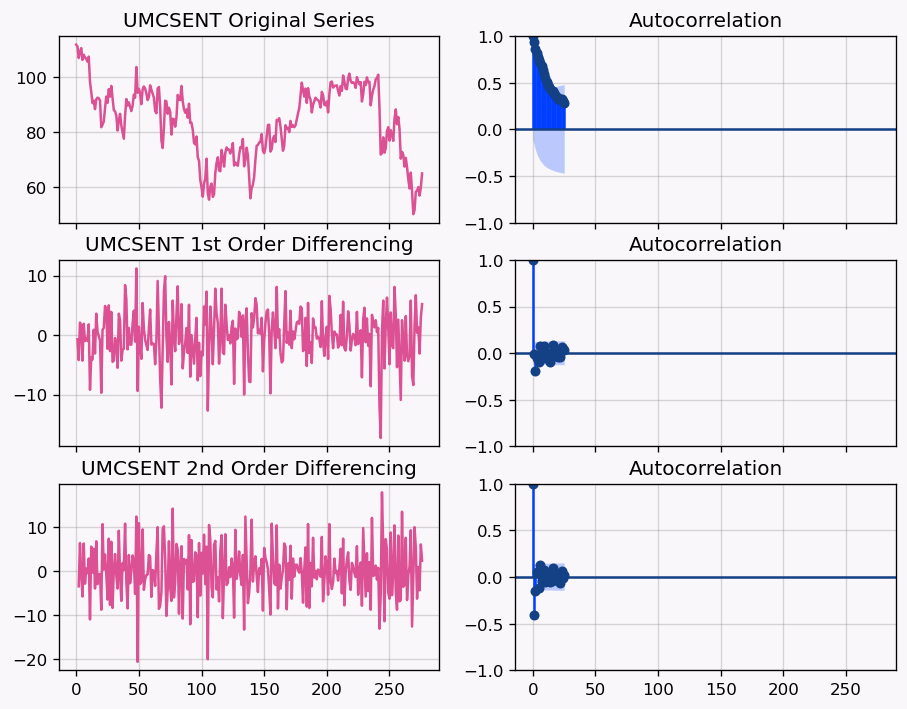

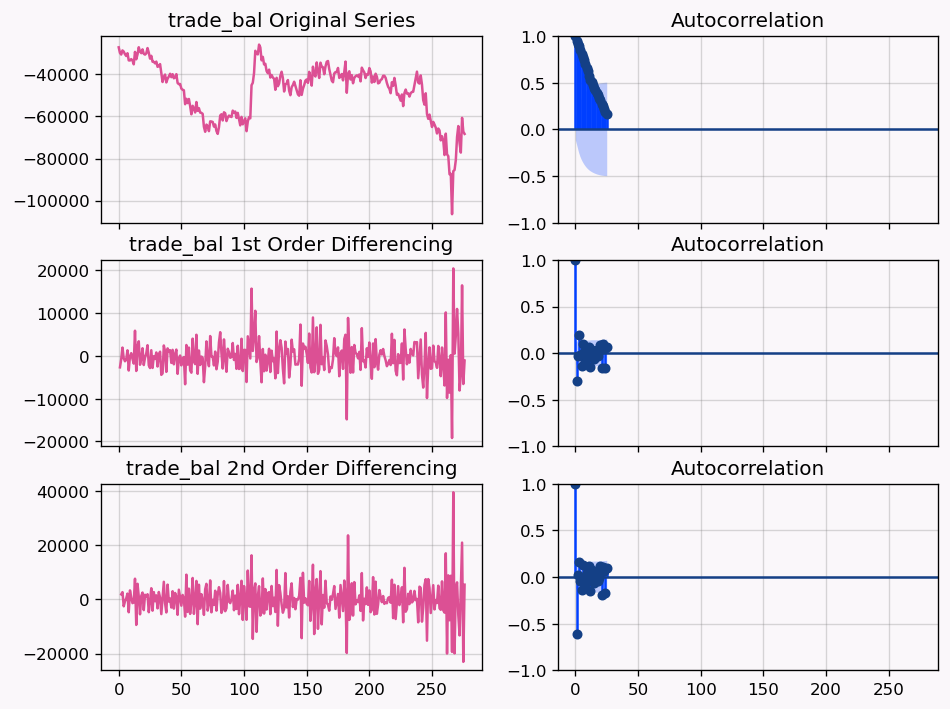

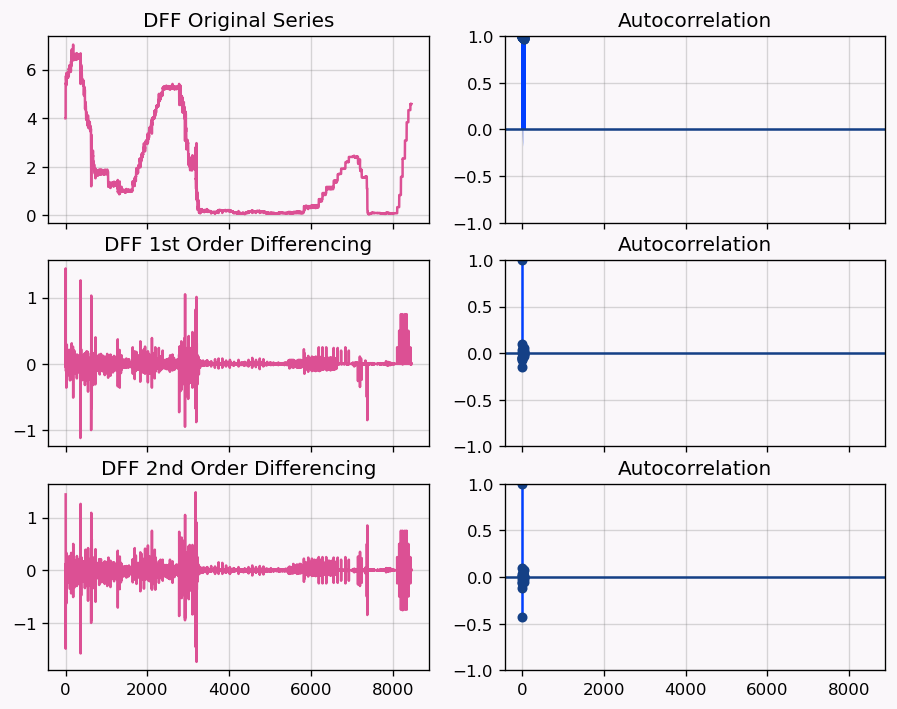

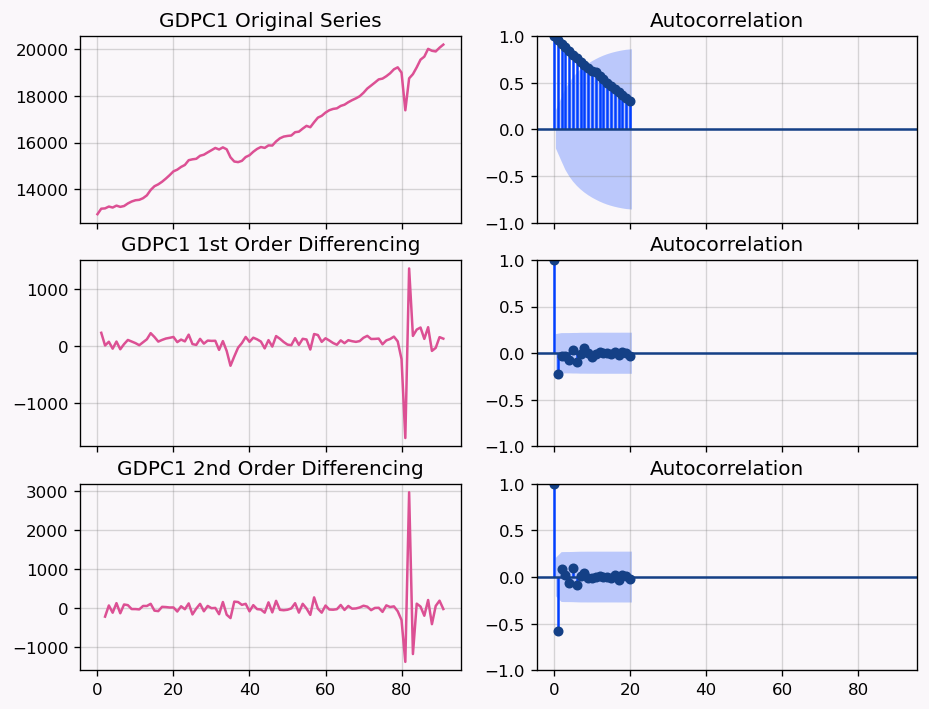

In [1125]:
for df in df_list_dv:
    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
    

    # Original Series
    fig, axes = plt.subplots(3, 2, sharex=True)
    axes[0, 0].plot(df[df.columns[0]]); axes[0, 0].set_title(df.columns[0]+' Original Series')
    plot_acf(df[df.columns[0]], ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df[df.columns[0]].diff()); axes[1, 0].set_title(df.columns[0]+' 1st Order Differencing')
    plot_acf(df[df.columns[0]].diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df[df.columns[0]].diff().diff()); axes[2, 0].set_title(df.columns[0]+' 2nd Order Differencing')
    plot_acf(df[df.columns[0]].diff().diff().dropna(), ax=axes[2, 1])
    
    ## cosmetics
    # add a grid to each subplot
    for ax in axes.flat:
        ax.grid(color = "grey", alpha = 0.3)
        
    background = tuple(np.array([250, 247, 250]) / 255)
    blue = tuple(np.array([20, 64, 134]) / 255)
    pink = tuple(np.array([220, 80, 148]) / 255)

    # change the color of each subplot
    for ax in axes.flat:
        ax.set_facecolor(background)

    # change the background color
    fig.set_facecolor(background)

    # change the color of the lines, if thw title does not include autocorrelation, change the color to pink, otherwise, change the color to blue
    for ax in fig.get_axes():
        if "Autocorrelation" not in ax.get_title():
            for line in ax.get_lines():
                line.set_color(pink)
        else:
            for line in ax.get_lines():
                line.set_color(blue)

    plt.show()

    fig.savefig("./ACF_Graphs/"+df.columns[0]+".png")

    
    # ax mea

### Finding the p: AIC & BIC Criterion

Using stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC. 

In [1126]:
### cleaning df_gdp
df_gdp.set_index('date', inplace=True)
df_gdp.index = pd.to_datetime(df_gdp.index)
# resample to month and forward fill the missing values
df_gdp = df_gdp.resample('M').ffill()
# create new index up until 2023-01-01 and forward fill the missing values
df_gdp = df_gdp.reindex(pd.date_range(start=df_gdp.index[0], end='2023-01-31', freq='M')).ffill()
df_gdp.reset_index(inplace=True)
df_gdp.rename(columns={'index': 'date'}, inplace=True)
# only keep the year and month
df_gdp['date'] = df_gdp['date'].dt.strftime('%Y-%m')
# shift the GDPC1 column to columns[0]
df_gdp = df_gdp[['GDPC1', 'date']]



In [1127]:
# Now for df_interest
df_interest = df_interest.groupby('date').mean().reset_index()
df_interest = df_interest[df_interest['date'] <= '2023-01']
df_interest = df_interest[['DFF', 'date']]

In [1128]:
df_list_dv = [df_sentiment, df_trade, df_interest, df_gdp]


In [1129]:
df_list_dv

[     UMCSENT     date
 0      112.0  2000-01
 1      111.3  2000-02
 2      107.1  2000-03
 3      109.2  2000-04
 4      110.7  2000-05
 ..       ...      ...
 272     58.6  2022-09
 273     59.9  2022-10
 274     56.8  2022-11
 275     59.7  2022-12
 276     64.9  2023-01
 
 [277 rows x 2 columns],
      trade_bal     date
 0     -27131.0  2000-01
 1     -29794.0  2000-02
 2     -30557.0  2000-03
 3     -28598.0  2000-04
 4     -29165.0  2000-05
 ..         ...      ...
 272   -72638.0  2022-09
 273   -77161.0  2022-10
 274   -60646.0  2022-11
 275   -67210.0  2022-12
 276   -68289.0  2023-01
 
 [277 rows x 2 columns],
           DFF     date
 0    5.448387  2000-01
 1    5.734828  2000-02
 2    5.853548  2000-03
 3    6.019667  2000-04
 4    6.268065  2000-05
 ..        ...      ...
 272  2.555000  2022-09
 273  3.080000  2022-10
 274  3.780000  2022-11
 275  4.104194  2022-12
 276  4.330000  2023-01
 
 [277 rows x 2 columns],
          GDPC1     date
 0    12935.252  2000-01
 1   

In [1130]:
df_interest.columns[0]

'DFF'

In [1183]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from stargazer.stargazer import Stargazer
# write a for loop to iterate through the list of dataframes to generate models for each dependent variable

# save the forecast result into a dataframe
df_forecast_dv = pd.DataFrame()

# create a canvas for 4 forecast plots
fig, axes = plt.subplots(2, 2, sharex=True)

## Auto Arima to select the best model
for df in df_list_dv:
    model = pm.auto_arima(df[df.columns[0]], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    
    # print the model summary
    print("======================================"+df.columns[0]+"=====================================")
    print( "The best model for "+df.columns[0]+" is: "+str(model.order)+" with AIC: "+str(model.aic())+" and BIC: "+str(model.bic()) )
    print(model.summary())
    print("============================================================================================")
    # leave 5 rows for the next model using next line \n
    print( "\n\n\n\n\n\n" )
    
    # Forecast
    n_periods = 24 # 12 months
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(df[df.columns[0]]), len(df[df.columns[0]])+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    # add the forecast result into the dataframe
    df_forecast_dv[df.columns[0]] = fc_series

    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # fc_series, lower_series, upper_series
    # Plot
    # four plots, use if statement to determine which subplot to use
    colors = ['#57a7cc', '#063970', '#e28743', '#D22B2B', '#C34A36']
    plt.style.use('seaborn-bright')
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    if df.columns[0] == 'UMCSENT':
        axes[0, 0].plot(df[df.columns[0]], color=colors[0])
        axes[0, 0].plot(fc_series, color='black', ls='--')
        axes[0, 0].fill_between(lower_series.index,
                            lower_series,
                            upper_series,
                            color='k', alpha=.15)
        axes[0, 0].set_title("Forecast for "+df.columns[0])
        # Add footnote
        target_date = 278
        target_value = fc_series.loc[target_date]
        lower_bound = lower_series.loc[target_date]
        upper_bound = upper_series.loc[target_date]
        #axes[0, 0].annotate('Forecast for '+ df.columns[0] +': '+str(round(target_value, 2))+', \n95%CI:('+str(round(lower_bound, 2))+' - '+str(round(upper_bound, 2))+')', xy=(0.35, 0.2), xytext=(0.35, 0.17), xycoords='axes fraction', textcoords='axes fraction', fontsize=7)
        
        ax[0, 0].annotate(
            f"Prediction: {target_value:.2f}\nLower bound: {lower_bound:.2f}\nUpper bound: {upper_bound:.2f}",
            xy=(278, target_value),
            xycoords="data",
            xytext=(0.35, 0.17)
            textcoords="axes fraction",
            arrowprops=dict(color=colors[0], arrowstyle="->", lw=0.7, connectionstyle = "angle3,angleA=0,angleB=110"),
            fontsize=8,
            color=colors[1],
            bbox=dict(facecolor="none", edgecolor=colors[0], boxstyle="round,pad=0.5"),
        )
    elif df.columns[0] == 'DFF':
        axes[1, 1].plot(df['DFF'], color=colors[0])
        axes[1, 1].plot(fc_series, color='black', ls='--')
        axes[1, 1].fill_between(lower_series.index,
                            lower_series,
                            upper_series,
                            color='k', alpha=.15)
        axes[1, 1].set_title("Forecast for "+df.columns[0])
        # Add footnote
        target_date = 278
        target_value = fc_series.loc[target_date]
        lower_bound = lower_series.loc[target_date]
        upper_bound = upper_series.loc[target_date]
        axes[1, 1].annotate('Forecast for '+ df.columns[0] +': '+str(round(target_value, 2))+', 95%CI:('+str(round(lower_bound, 2))+' - '+str(round(upper_bound, 2))+')', xy=(0.1, 0.3), xytext=(0.1, 0.3), xycoords='axes fraction', textcoords='axes fraction', fontsize=7)
    elif df.columns[0] == 'GDPC1':
        axes[0, 1].plot(df[df.columns[0]], color=colors[0])
        axes[0, 1].plot(fc_series, color='black', ls='--')
        axes[0, 1].fill_between(lower_series.index,
                            lower_series,
                            upper_series,
                            color='k', alpha=.15)
        axes[0, 1].set_title("Forecast for "+df.columns[0])
        # Add footnote
        target_date = 278
        target_value = fc_series.loc[target_date]
        lower_bound = lower_series.loc[target_date]
        upper_bound = upper_series.loc[target_date]
        axes[0, 1].annotate('Forecast for '+ df.columns[0] +': '+str(round(target_value, 2))+', 95%CI:('+str(round(lower_bound, 2))+' - '+str(round(upper_bound, 2))+')', xy=(0.1, 0.3), xytext=(0.1, 0.3), xycoords='axes fraction', textcoords='axes fraction', fontsize=7)
    else:
        axes[1, 0].plot(df[df.columns[0]], color=colors[0])
        axes[1, 0].plot(fc_series, color='black', ls='--')
        axes[1, 0].fill_between(lower_series.index,
                            lower_series,
                            upper_series,
                            color='k', alpha=.15)
        axes[1, 0].set_title("Forecast for "+df.columns[0])
        # Add footnote
        target_date = 278
        target_value = fc_series.loc[target_date]
        lower_bound = lower_series.loc[target_date]
        upper_bound = upper_series.loc[target_date]
        axes[1, 0].annotate('Forecast for '+ df.columns[0] +': '+str(round(target_value, 2))+', 95%CI:('+str(round(lower_bound, 2))+' - '+str(round(upper_bound, 2))+')', xy=(0.1, 0.3), xytext=(0.1, 0.3), xycoords='axes fraction', textcoords='axes fraction', fontsize=7)


    # add a grid to each subplot
    for ax in axes.flat:
        ax.grid(color = "grey", alpha = 0.3)
        
    background = tuple(np.array([250, 247, 250]) / 255)
    blue = tuple(np.array([20, 64, 134]) / 255)
    pink = tuple(np.array([220, 80, 148]) / 255)

    # change the color of each subplot
    for ax in axes.flat:
        ax.set_facecolor(background)

    # change the background color
    fig.set_facecolor(background)
    

fig.savefig("./ARIMA_Models/exogenous_vars.png")

SyntaxError: invalid syntax (1105149811.py, line 75)

In [1132]:
df_interest.tail()

DFF     date
272  2.555000  2022-09
273  3.080000  2022-10
274  3.780000  2022-11
275  4.104194  2022-12
276  4.330000  2023-01

In [1173]:
df_forecast_dv

UMCSENT
277  63.997576
278  63.014811
279  63.014811
280  63.014811
281  63.014811
282  63.014811
283  63.014811
284  63.014811
285  63.014811
286  63.014811
287  63.014811
288  63.014811
289  63.014811
290  63.014811
291  63.014811
292  63.014811
293  63.014811
294  63.014811
295  63.014811
296  63.014811
297  63.014811
298  63.014811
299  63.014811
300  63.014811

## ARIMA Model for Currency


Initial Cleaning:

In [1134]:
df_china.dropna(inplace=True)
df_jpy.isna().sum()
# add them to a list
df_list_forex = [df_jpy, df_gbp, df_eu]
    

In [1135]:
for df in df_list_forex:
    result = adfuller(df[df.columns[1]])
    print("==="+df.columns[1]+"===================================")
    print('ADF Statistic: %f' % result[1])
    print('p-value: %f' % result[1])
    if result[1] > 0.05:
        print("The "+df.columns[1]+" series is not stationary, we fail to reject the null hypothesis")
    else:
        print("The "+df.columns[1]+" series is stationary, we reject the null hypothesis")
    print("===============================================")

===JPYUSD===================================
ADF Statistic: 0.519479
p-value: 0.519479
The JPYUSD series is not stationary, we fail to reject the null hypothesis
===GBPUSD===================================
ADF Statistic: 0.606932
p-value: 0.606932
The GBPUSD series is not stationary, we fail to reject the null hypothesis
===EURUSD===================================
ADF Statistic: 0.471325
p-value: 0.471325
The EURUSD series is not stationary, we fail to reject the null hypothesis


### Currency ACF Plots

In [1136]:
df_gbp[df_gbp.columns[1]]

0      1.753903
1      1.821047
2      1.869247
3      1.828007
4      1.804626
         ...   
226    1.129808
227    1.172473
228    1.217089
229    1.223238
230    1.209453
Name: GBPUSD, Length: 231, dtype: float64

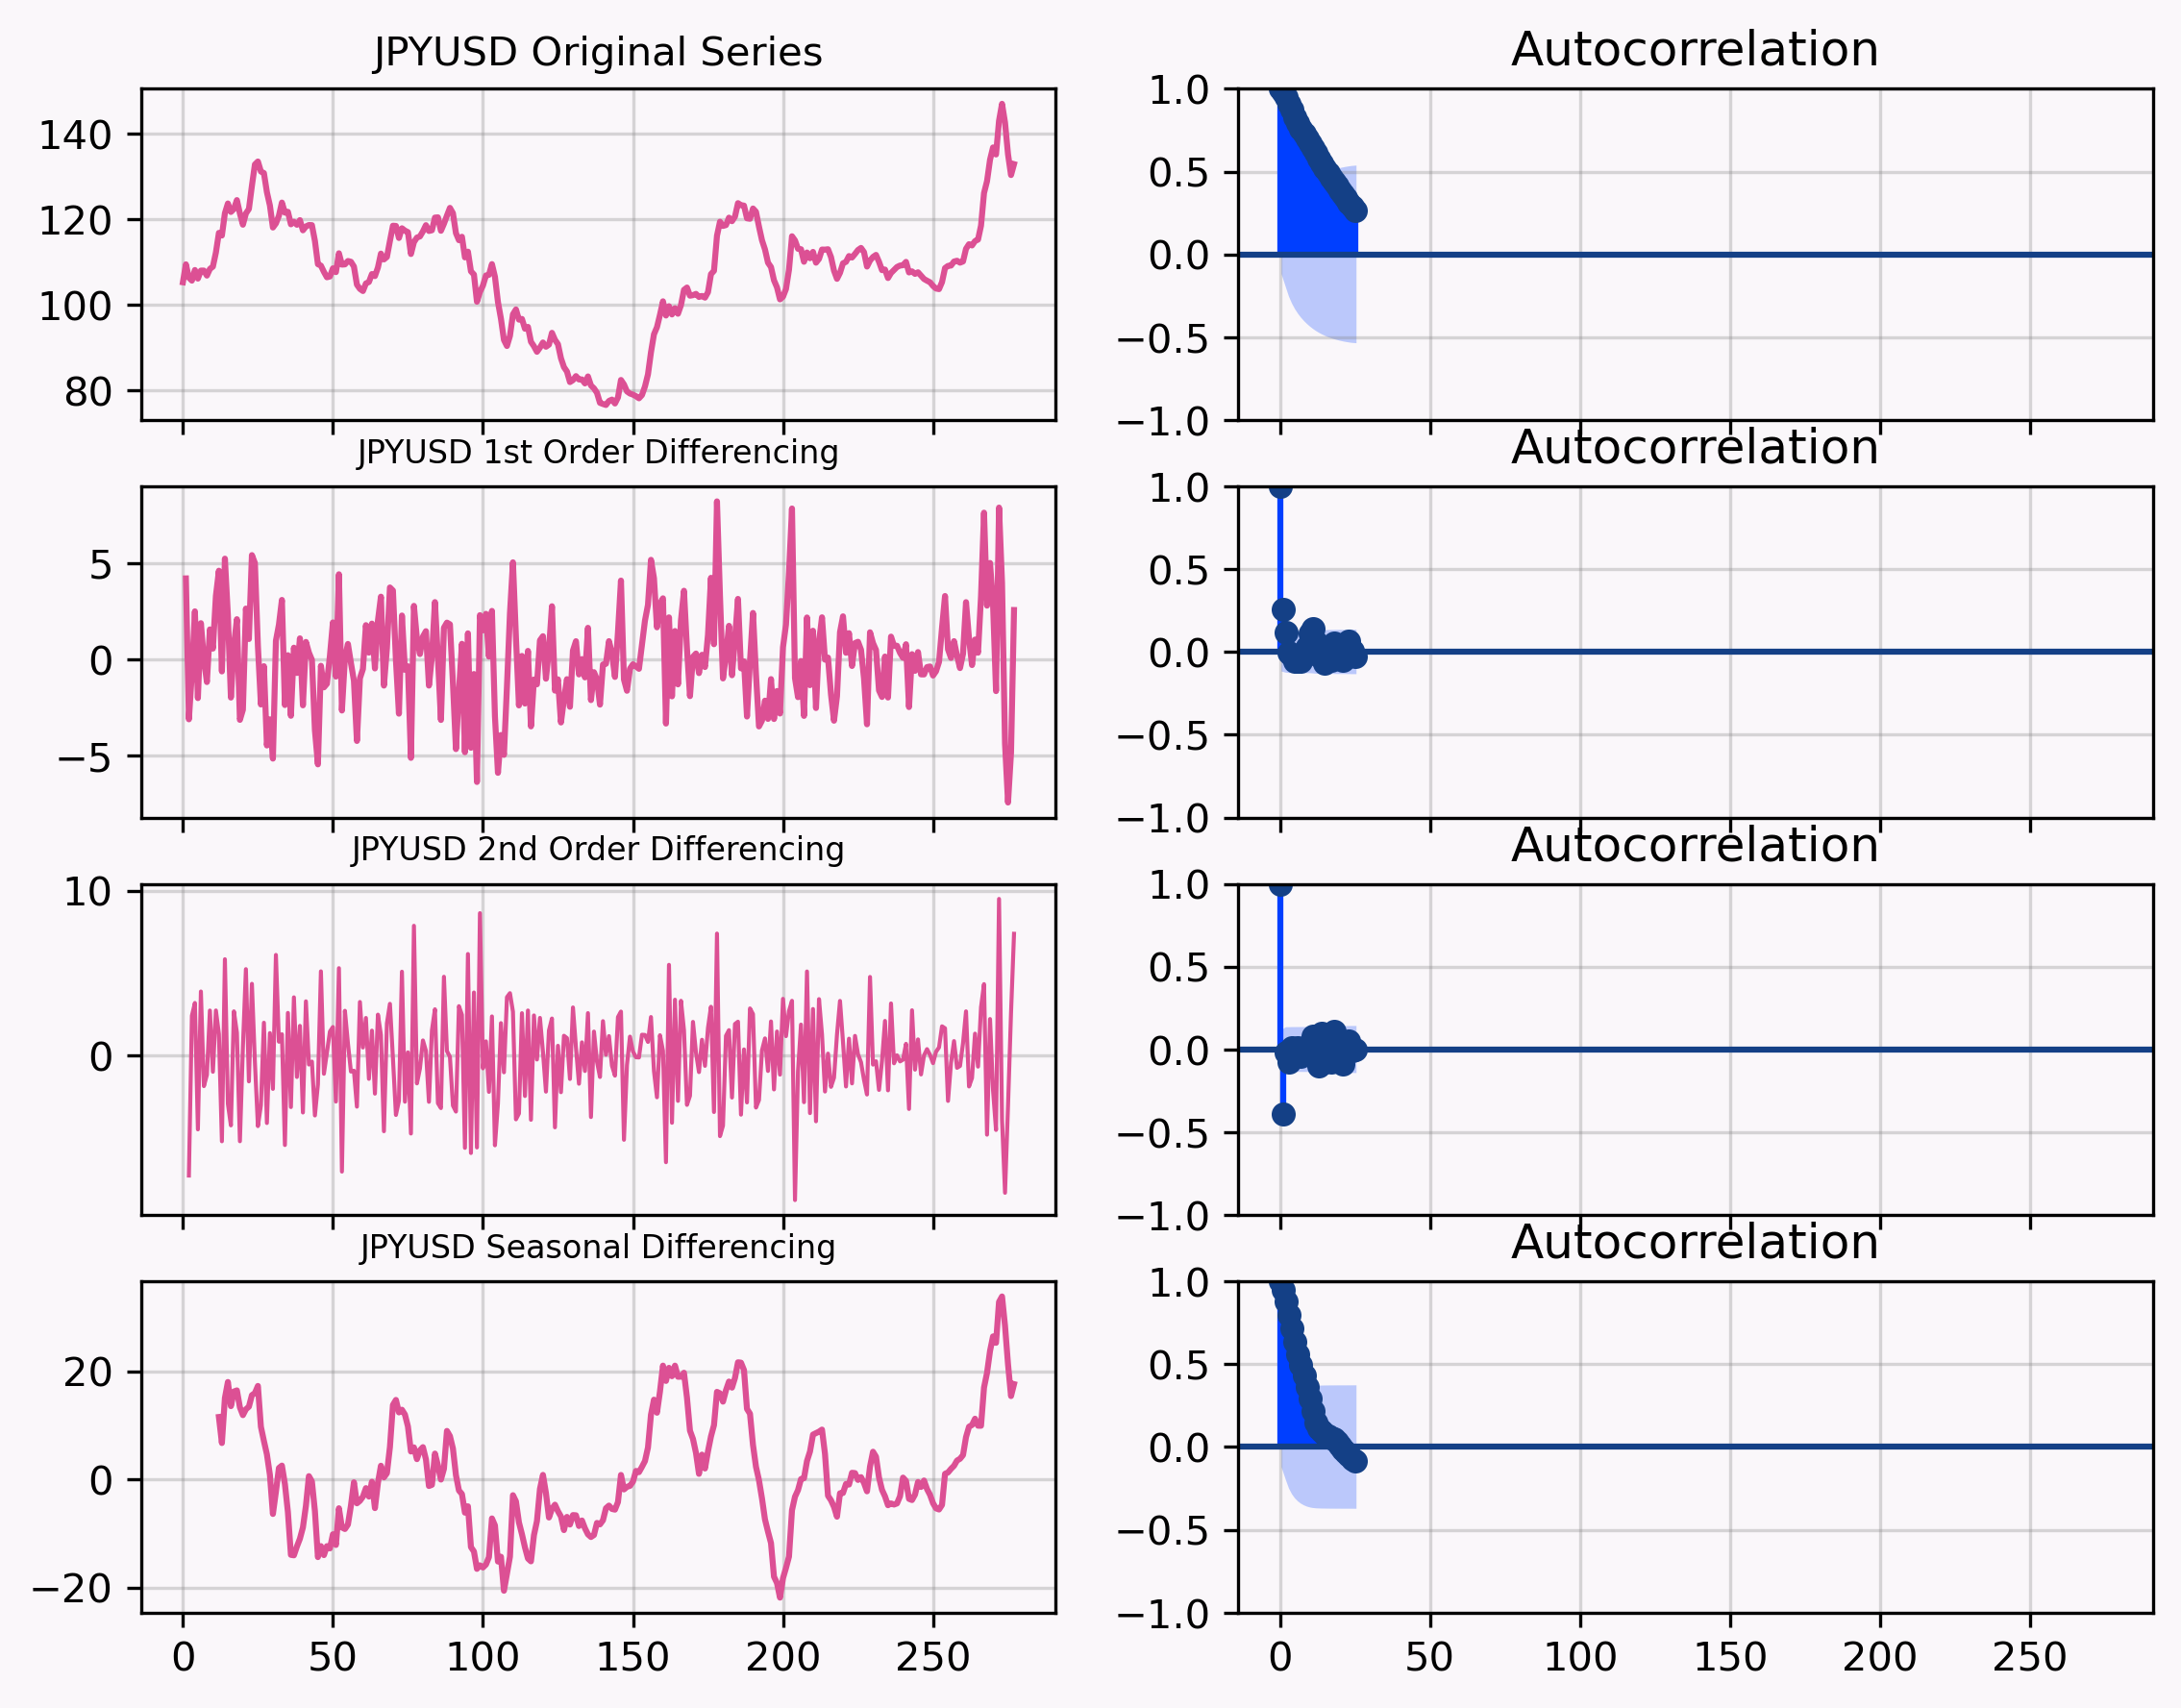

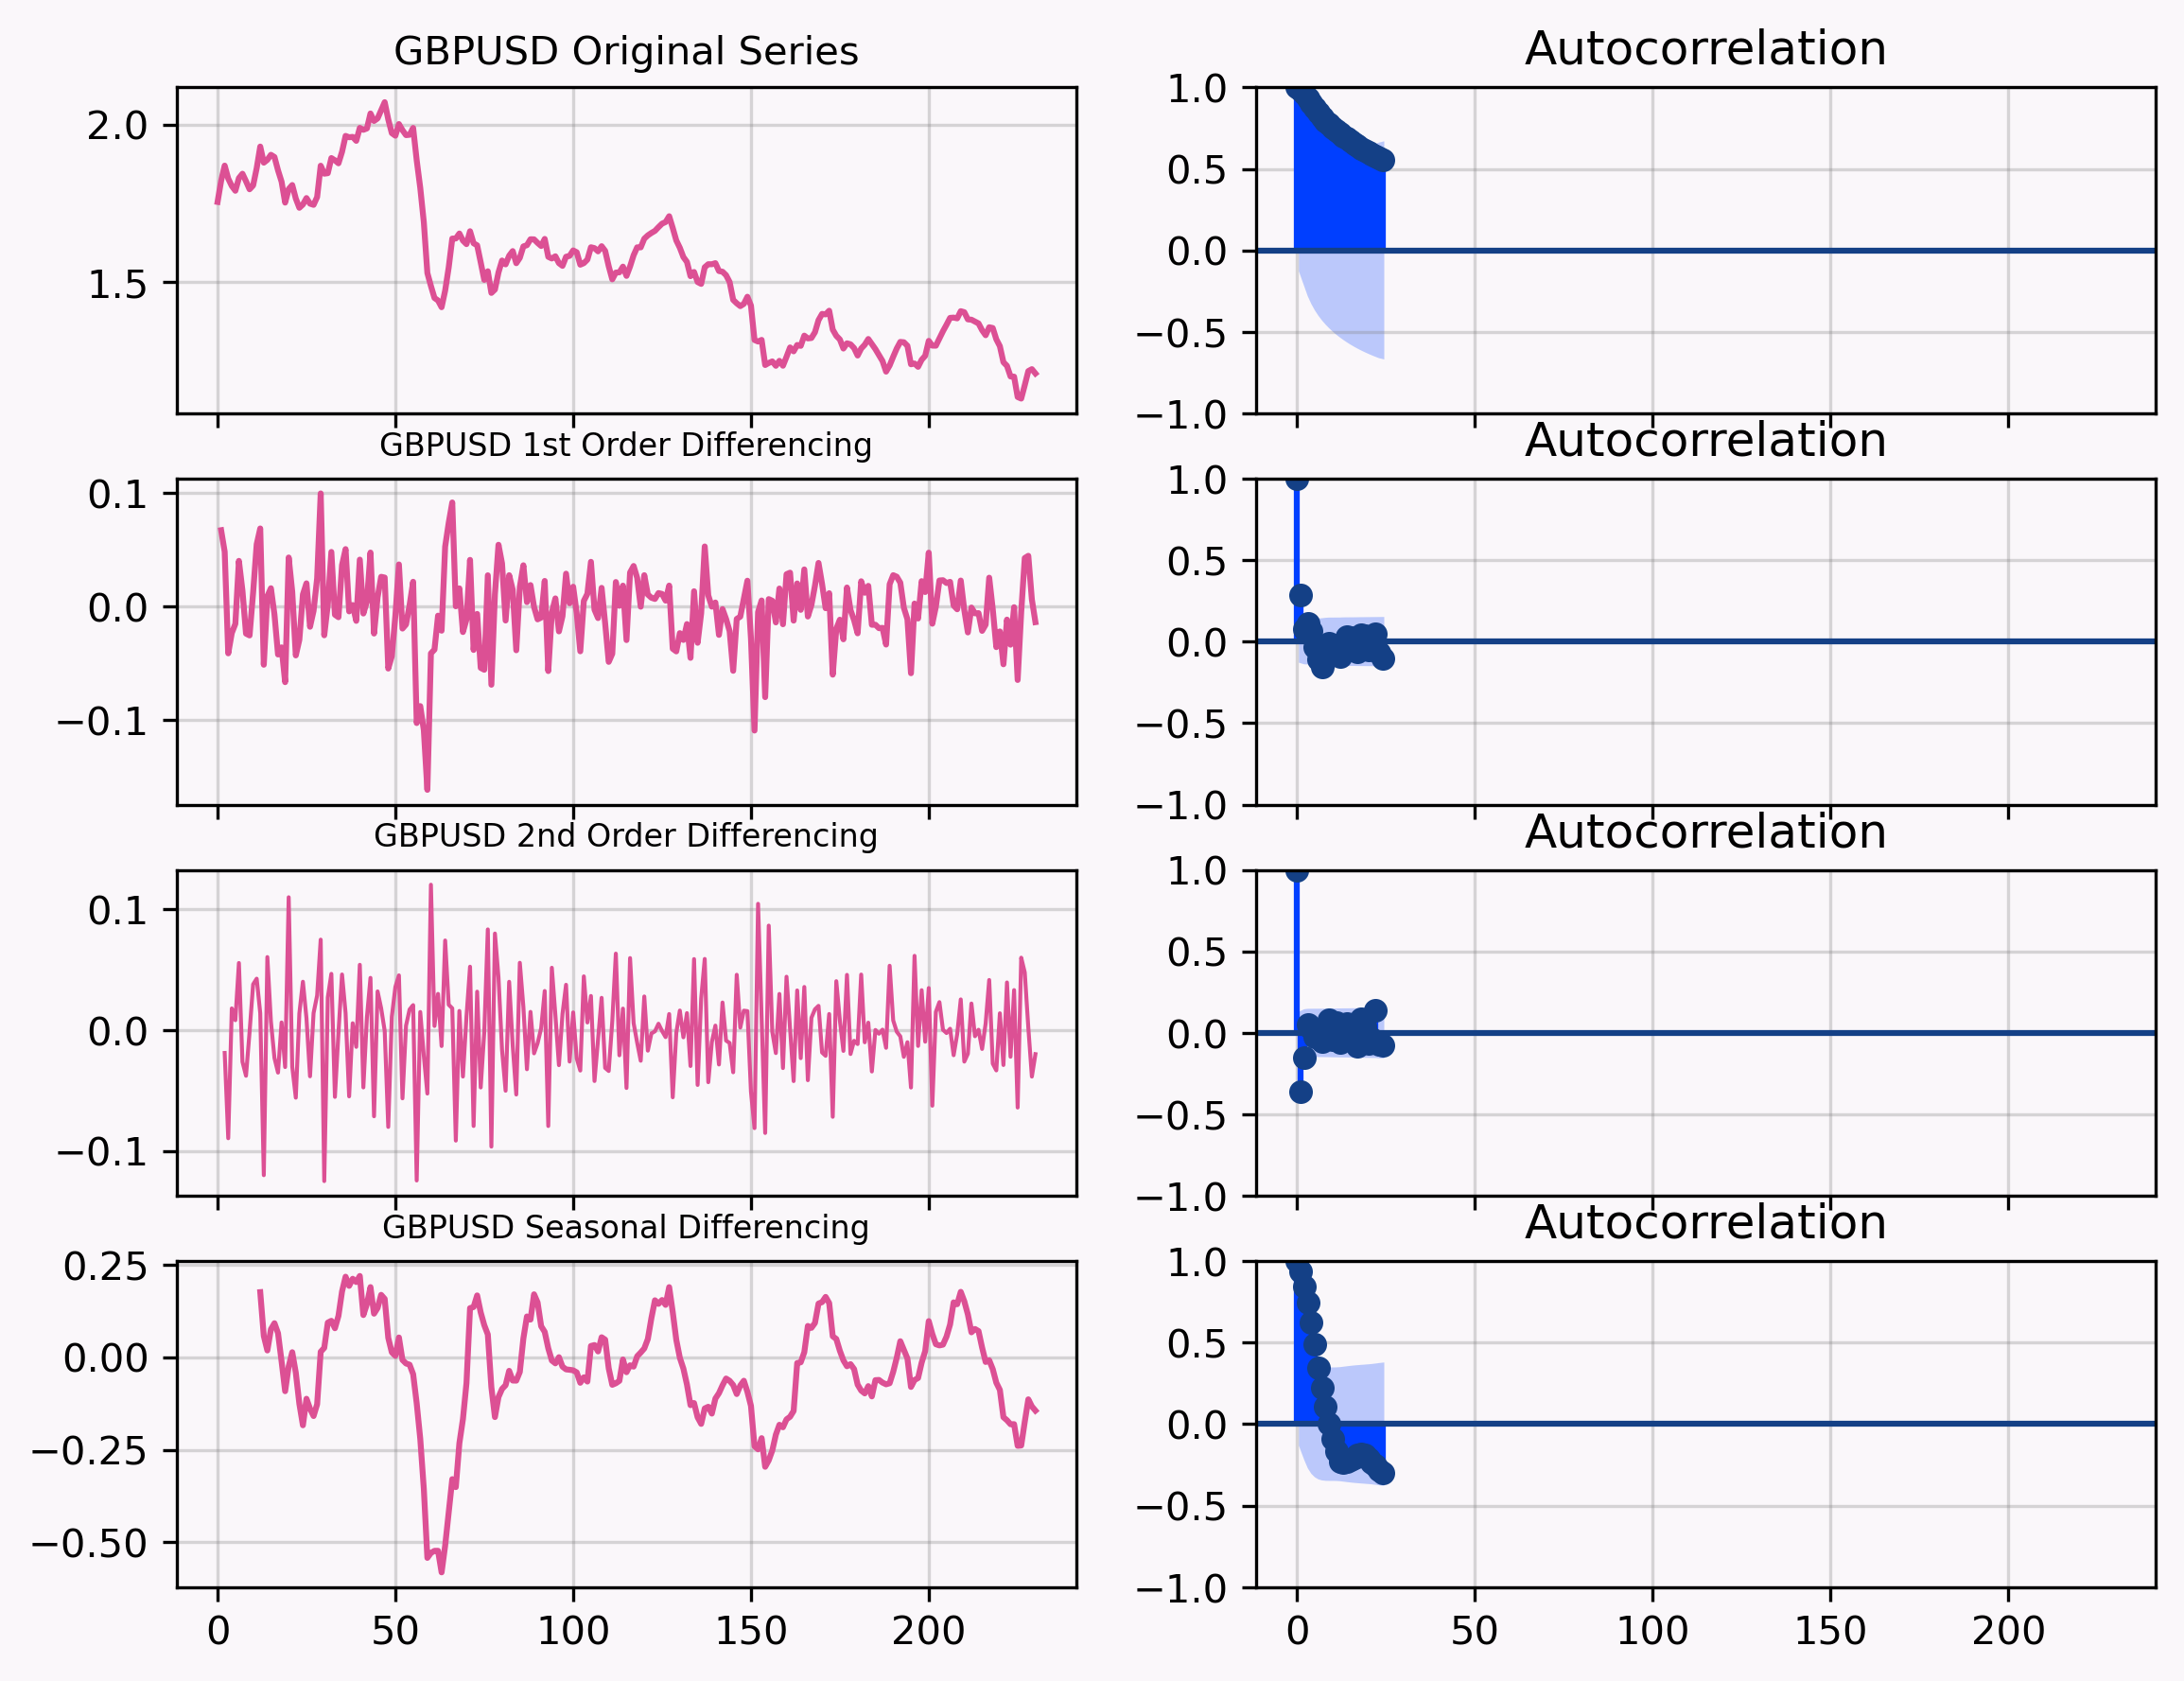

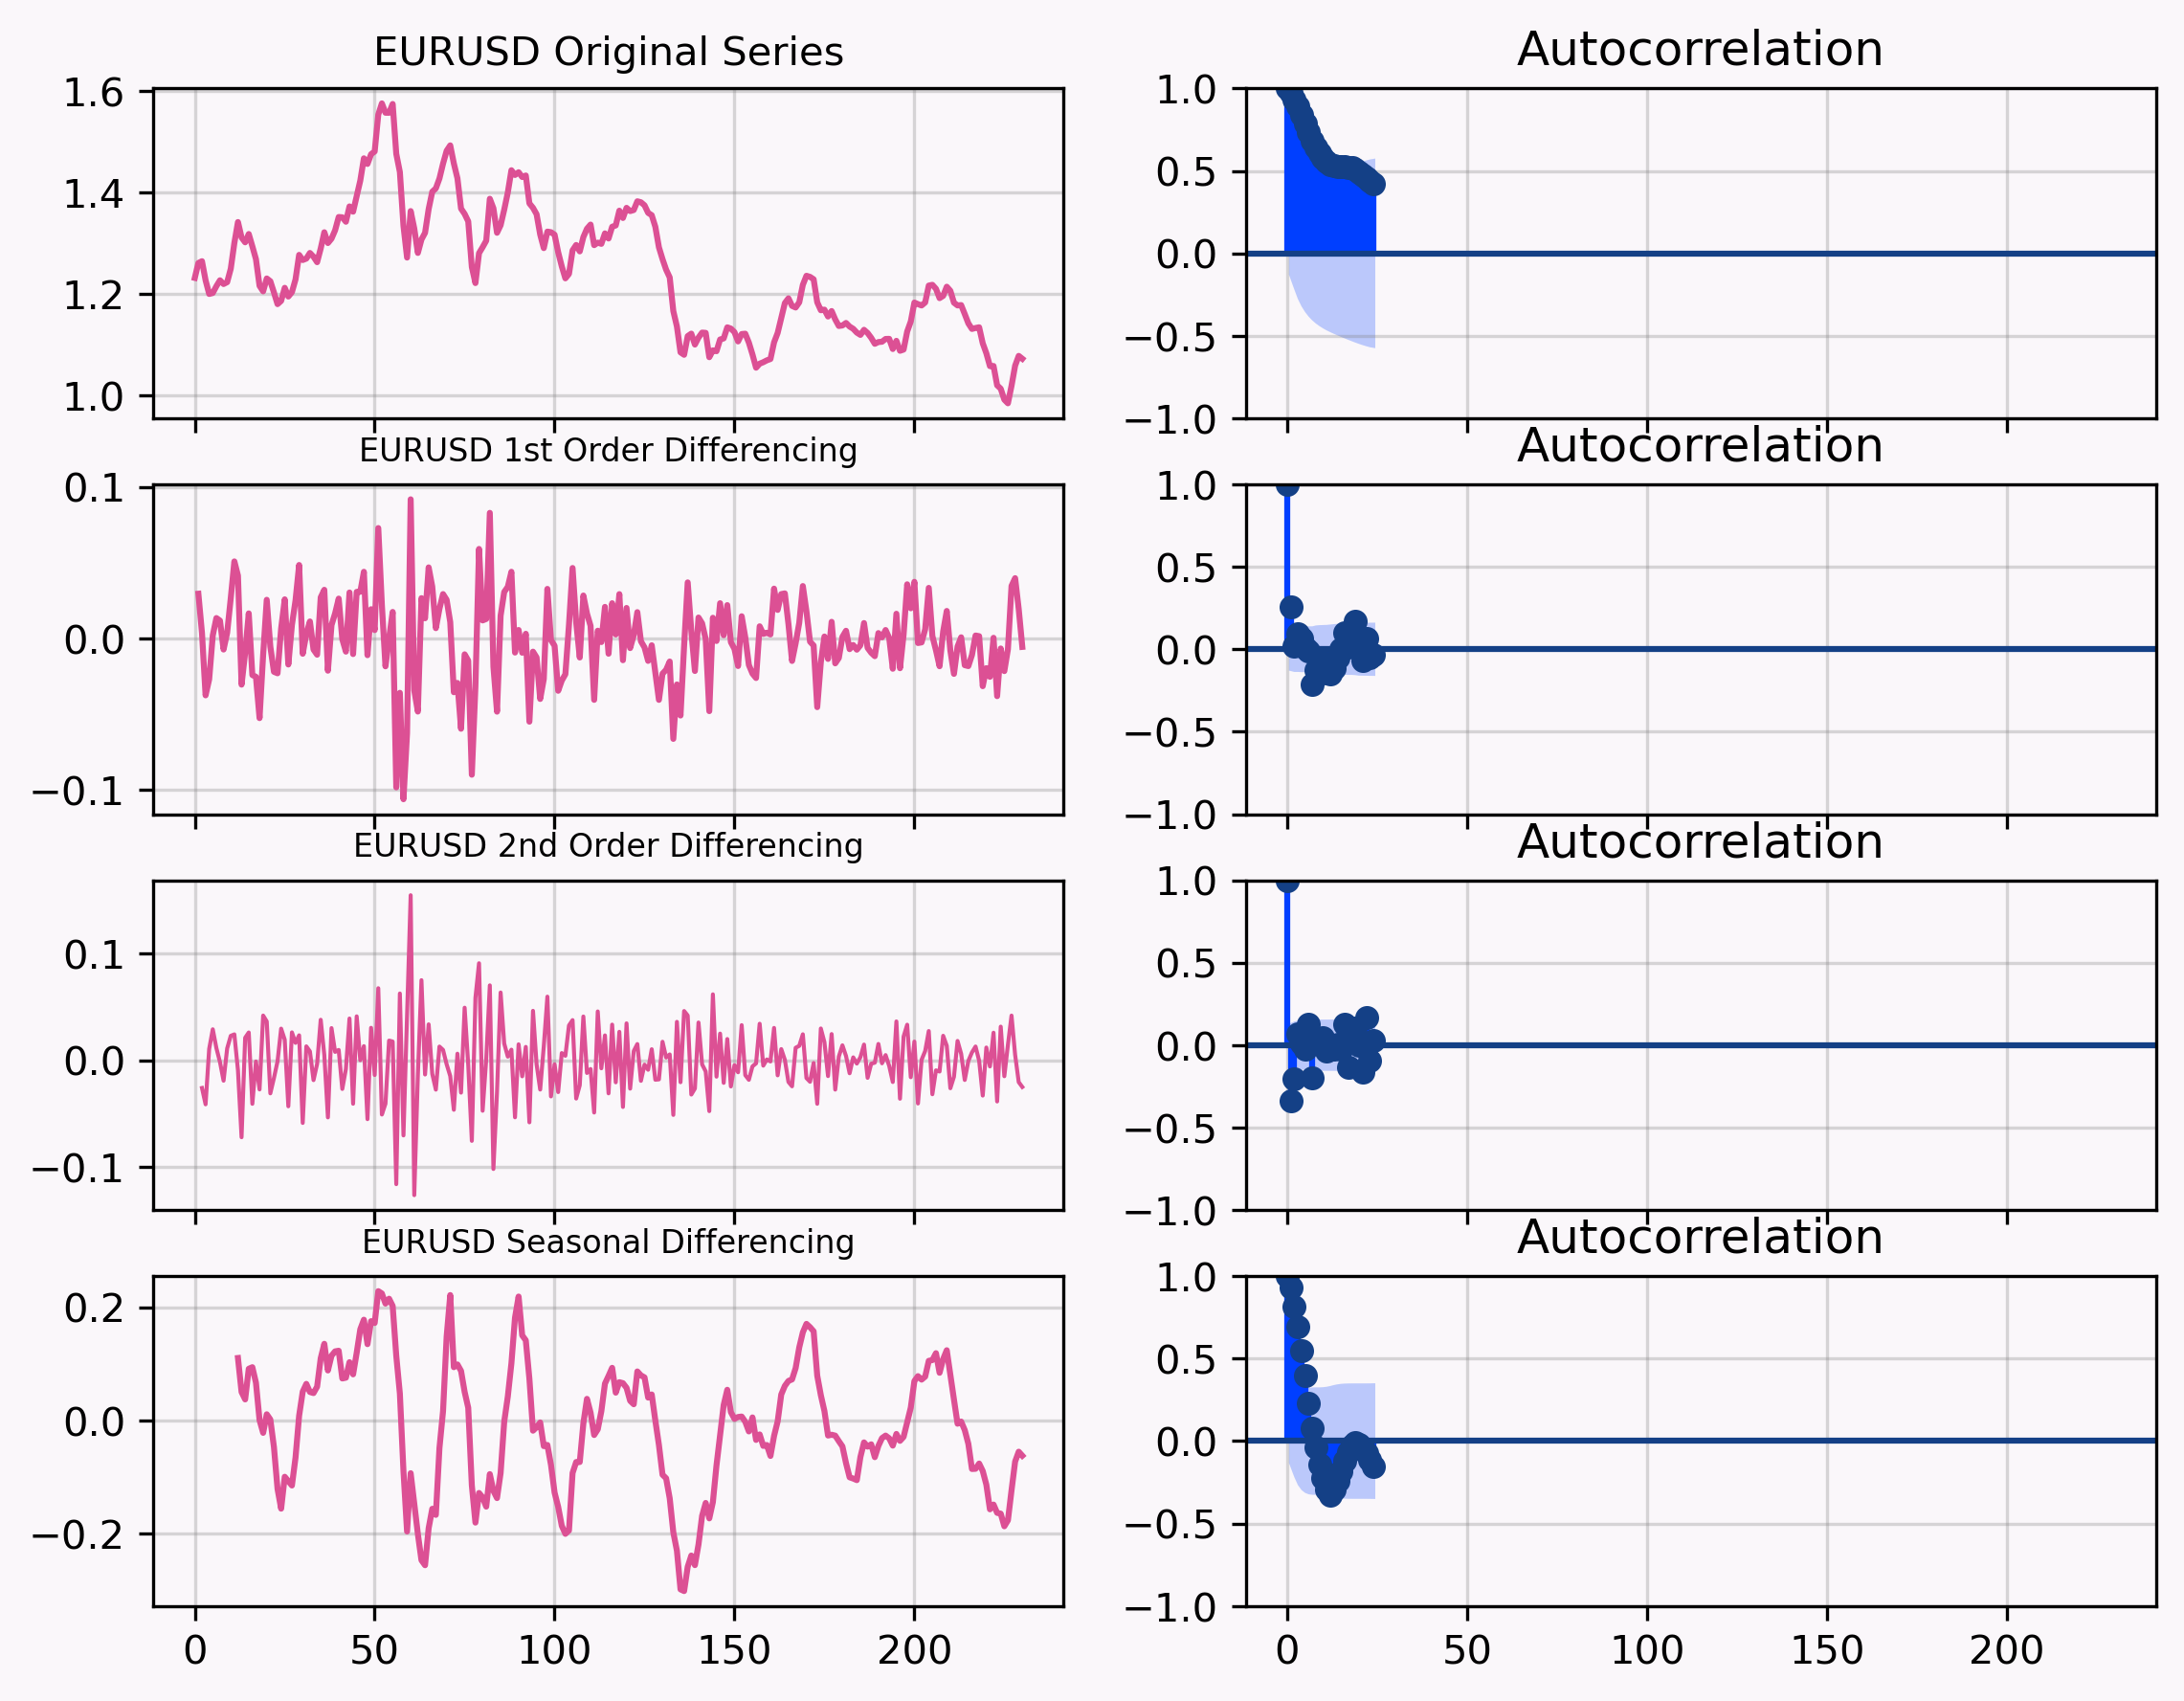

In [1137]:
for df in df_list_forex:
    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':300})
    

    # Original Series
    fig, axes = plt.subplots(4, 2, sharex=True)
    axes[0, 0].plot(df[df.columns[1]]); axes[0, 0].set_title(df.columns[1]+' Original Series', fontsize=10)
    plot_acf(df[df.columns[1]], ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df[df.columns[1]].diff()); axes[1, 0].set_title(df.columns[1]+' 1st Order Differencing', fontsize=8)
    plot_acf(df[df.columns[1]].diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df[df.columns[1]].diff().diff()); axes[2, 0].set_title(df.columns[1]+' 2nd Order Differencing', fontsize=8)
    # also line weight
    axes[2, 0].lines[0].set_linewidth(1)
    plot_acf(df[df.columns[1]].diff().diff().dropna(), ax=axes[2, 1])
    
    # Seasonal Differencing
    axes[3, 0].plot(df[df.columns[1]].diff(12)); axes[3, 0].set_title(df.columns[1]+' Seasonal Differencing', fontsize=8)
    plot_acf(df[df.columns[1]].diff(12).dropna(), ax=axes[3, 1])
    # add a grid to each subplot
    for ax in axes.flat:
        ax.grid(color = "grey", alpha = 0.3)
        
    background = tuple(np.array([250, 247, 250]) / 255)
    blue = tuple(np.array([20, 64, 134]) / 255)
    pink = tuple(np.array([220, 80, 148]) / 255)

    # change the color of each subplot
    for ax in axes.flat:
        ax.set_facecolor(background)

    # change the background color
    fig.set_facecolor(background)

    # change the color of the lines, if thw title does not include autocorrelation, change the color to pink, otherwise, change the color to blue
    for ax in fig.get_axes():
        if "Autocorrelation" not in ax.get_title():
            for line in ax.get_lines():
                line.set_color(pink)
        else:
            for line in ax.get_lines():
                line.set_color(blue)
    
    plt.show()

    fig.savefig("./ACF_Graphs/"+df.columns[1]+".png")



In [1138]:
# iterate through the list to make date the index
for df in df_list_forex:
    df.set_index("date", inplace=True)
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)

### Seasonal Differencing Plot for Currency

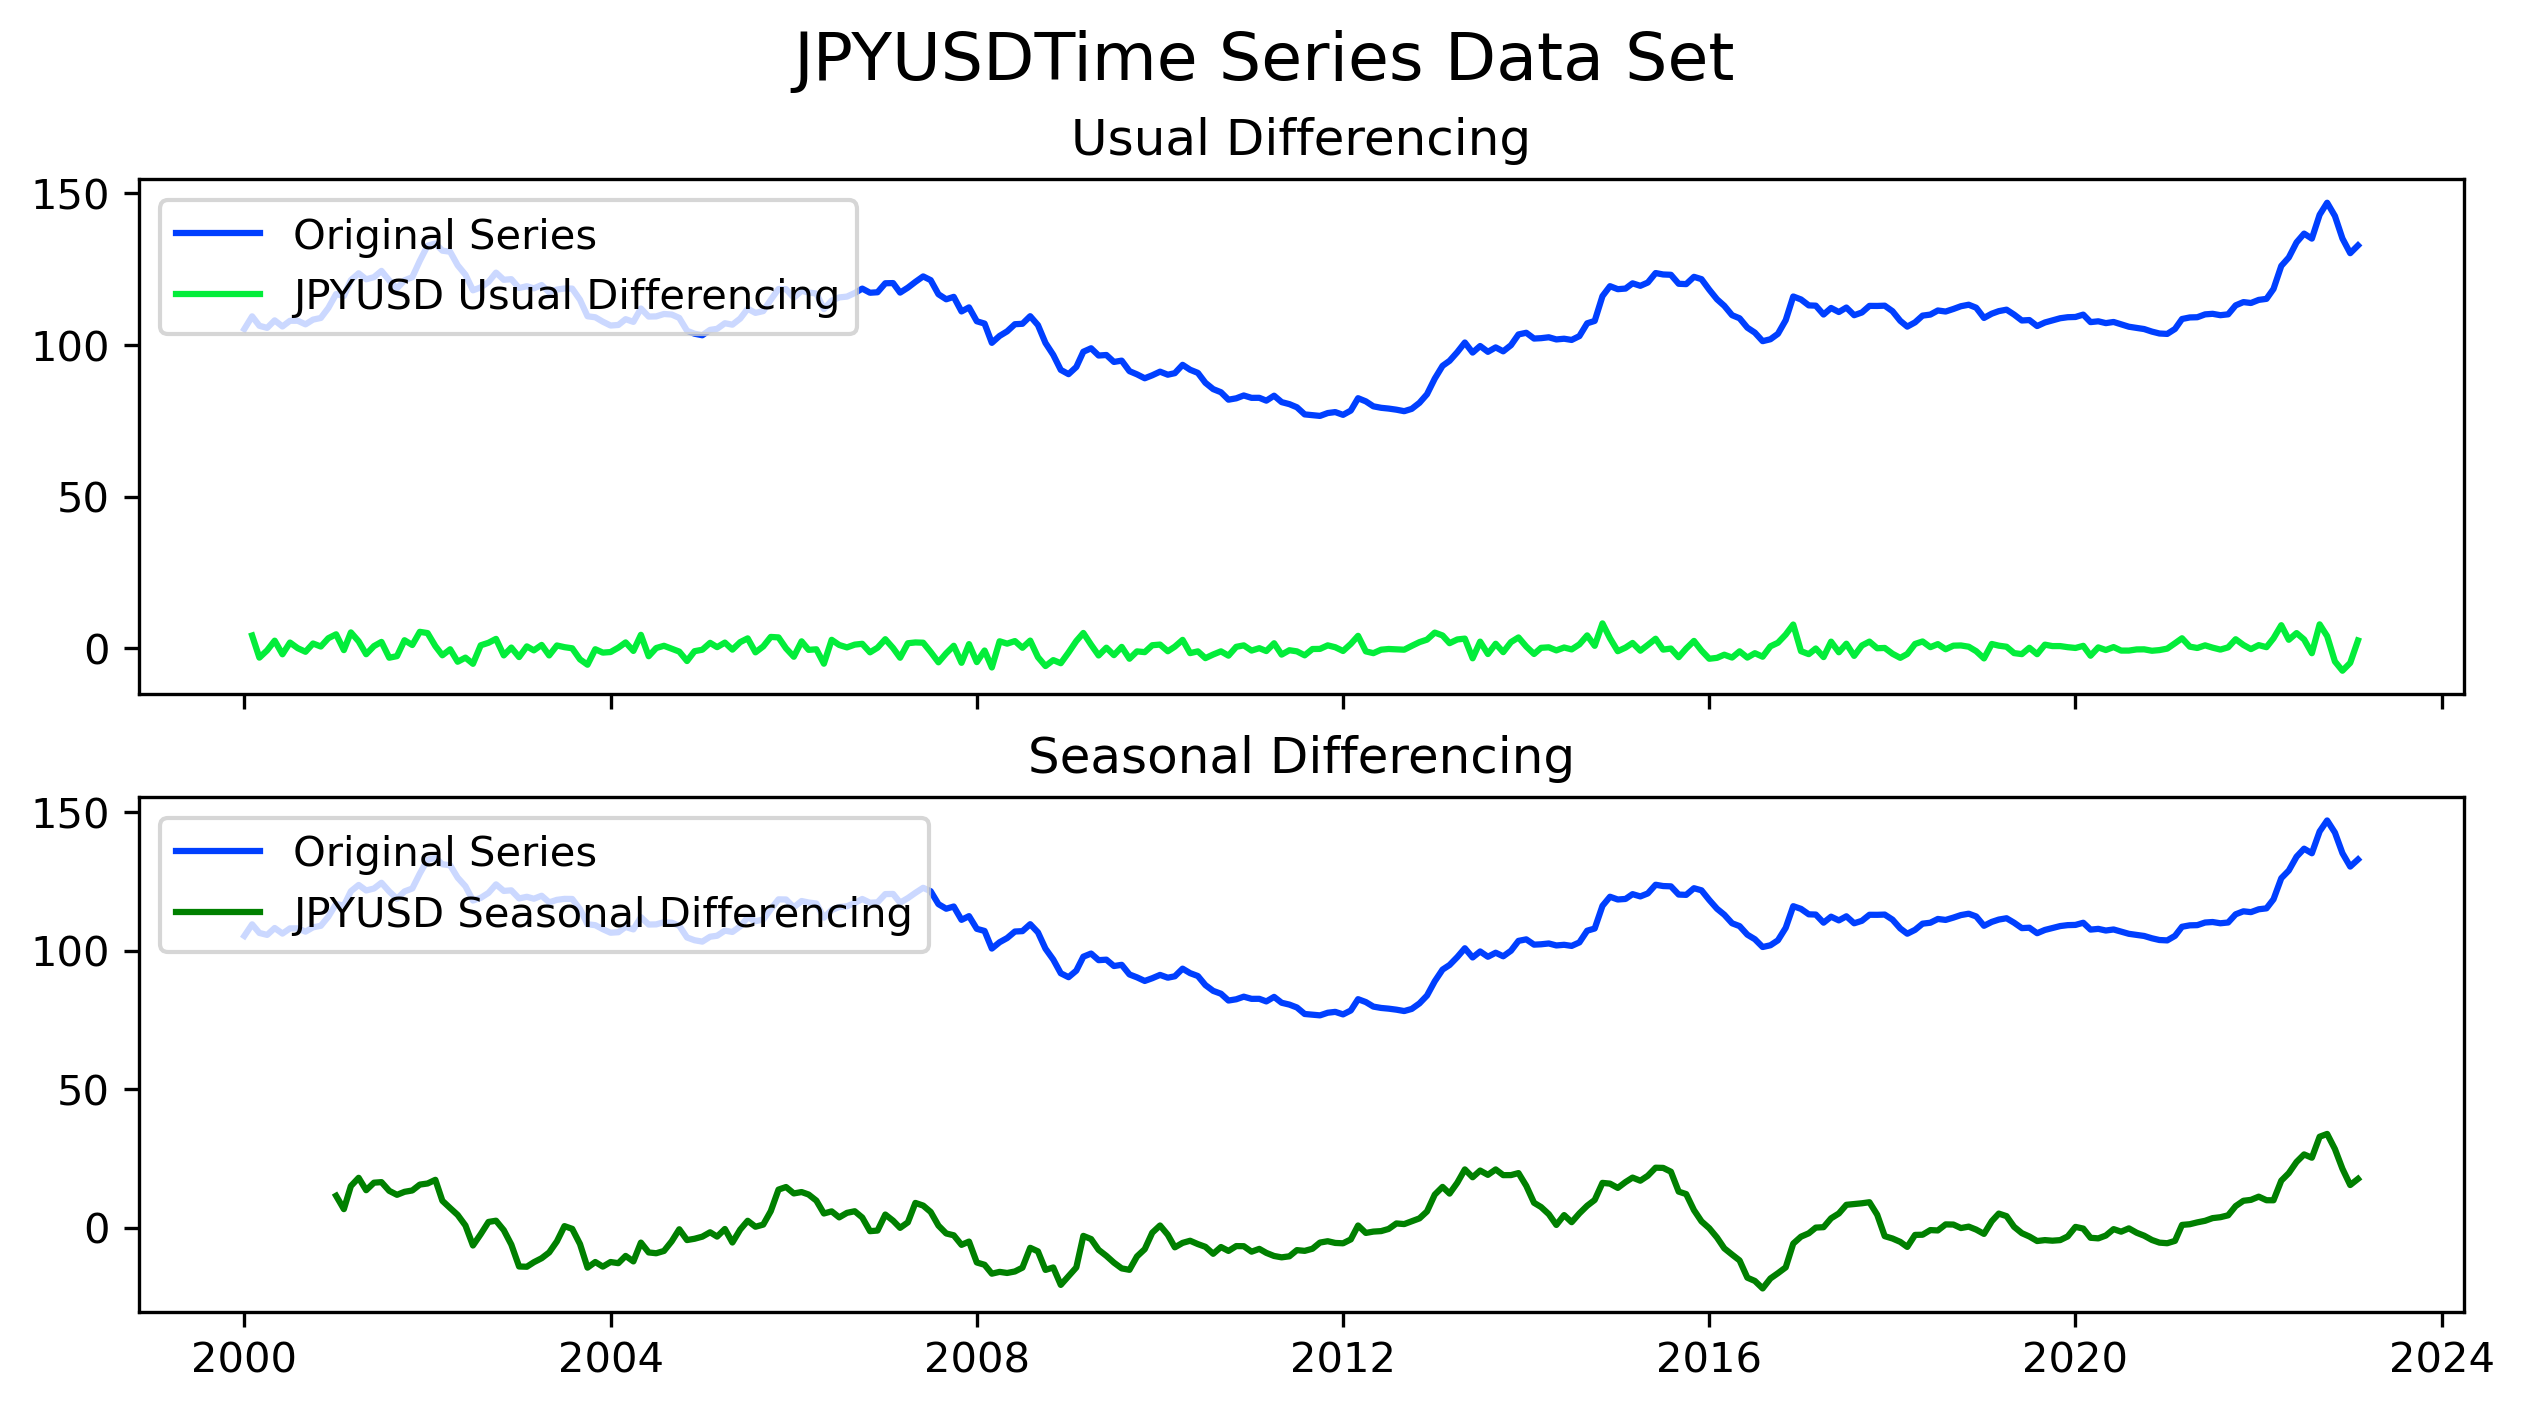

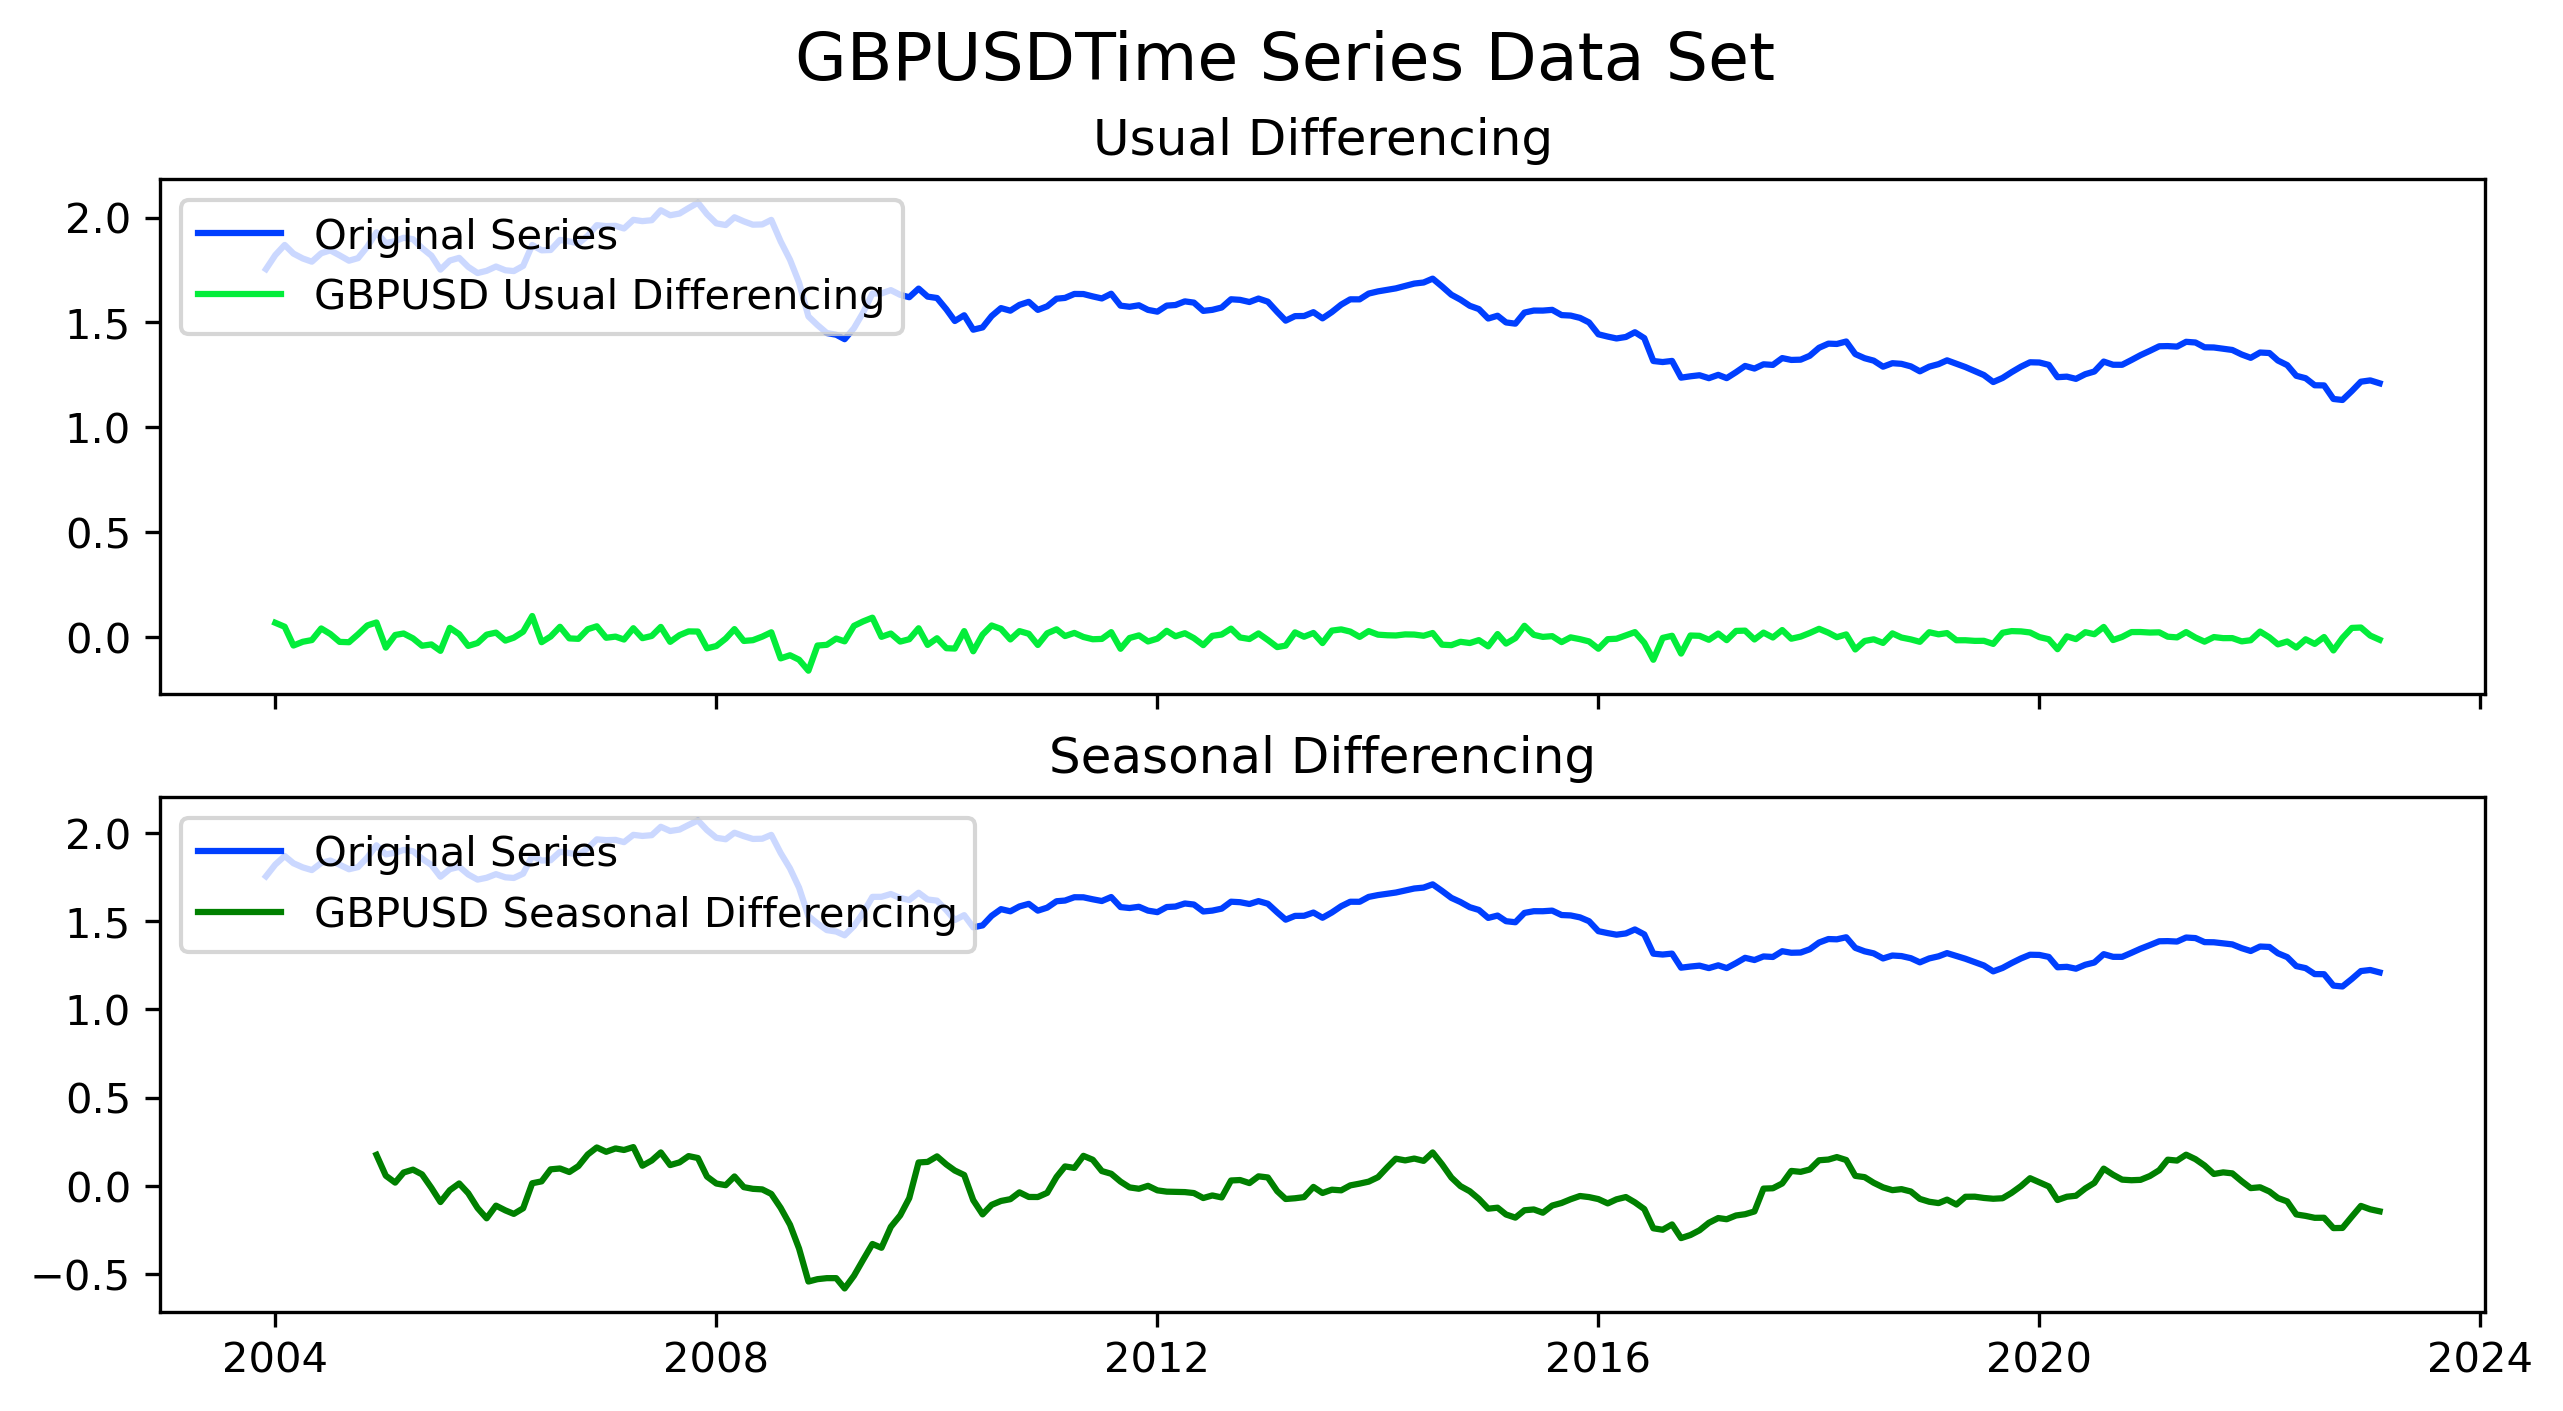

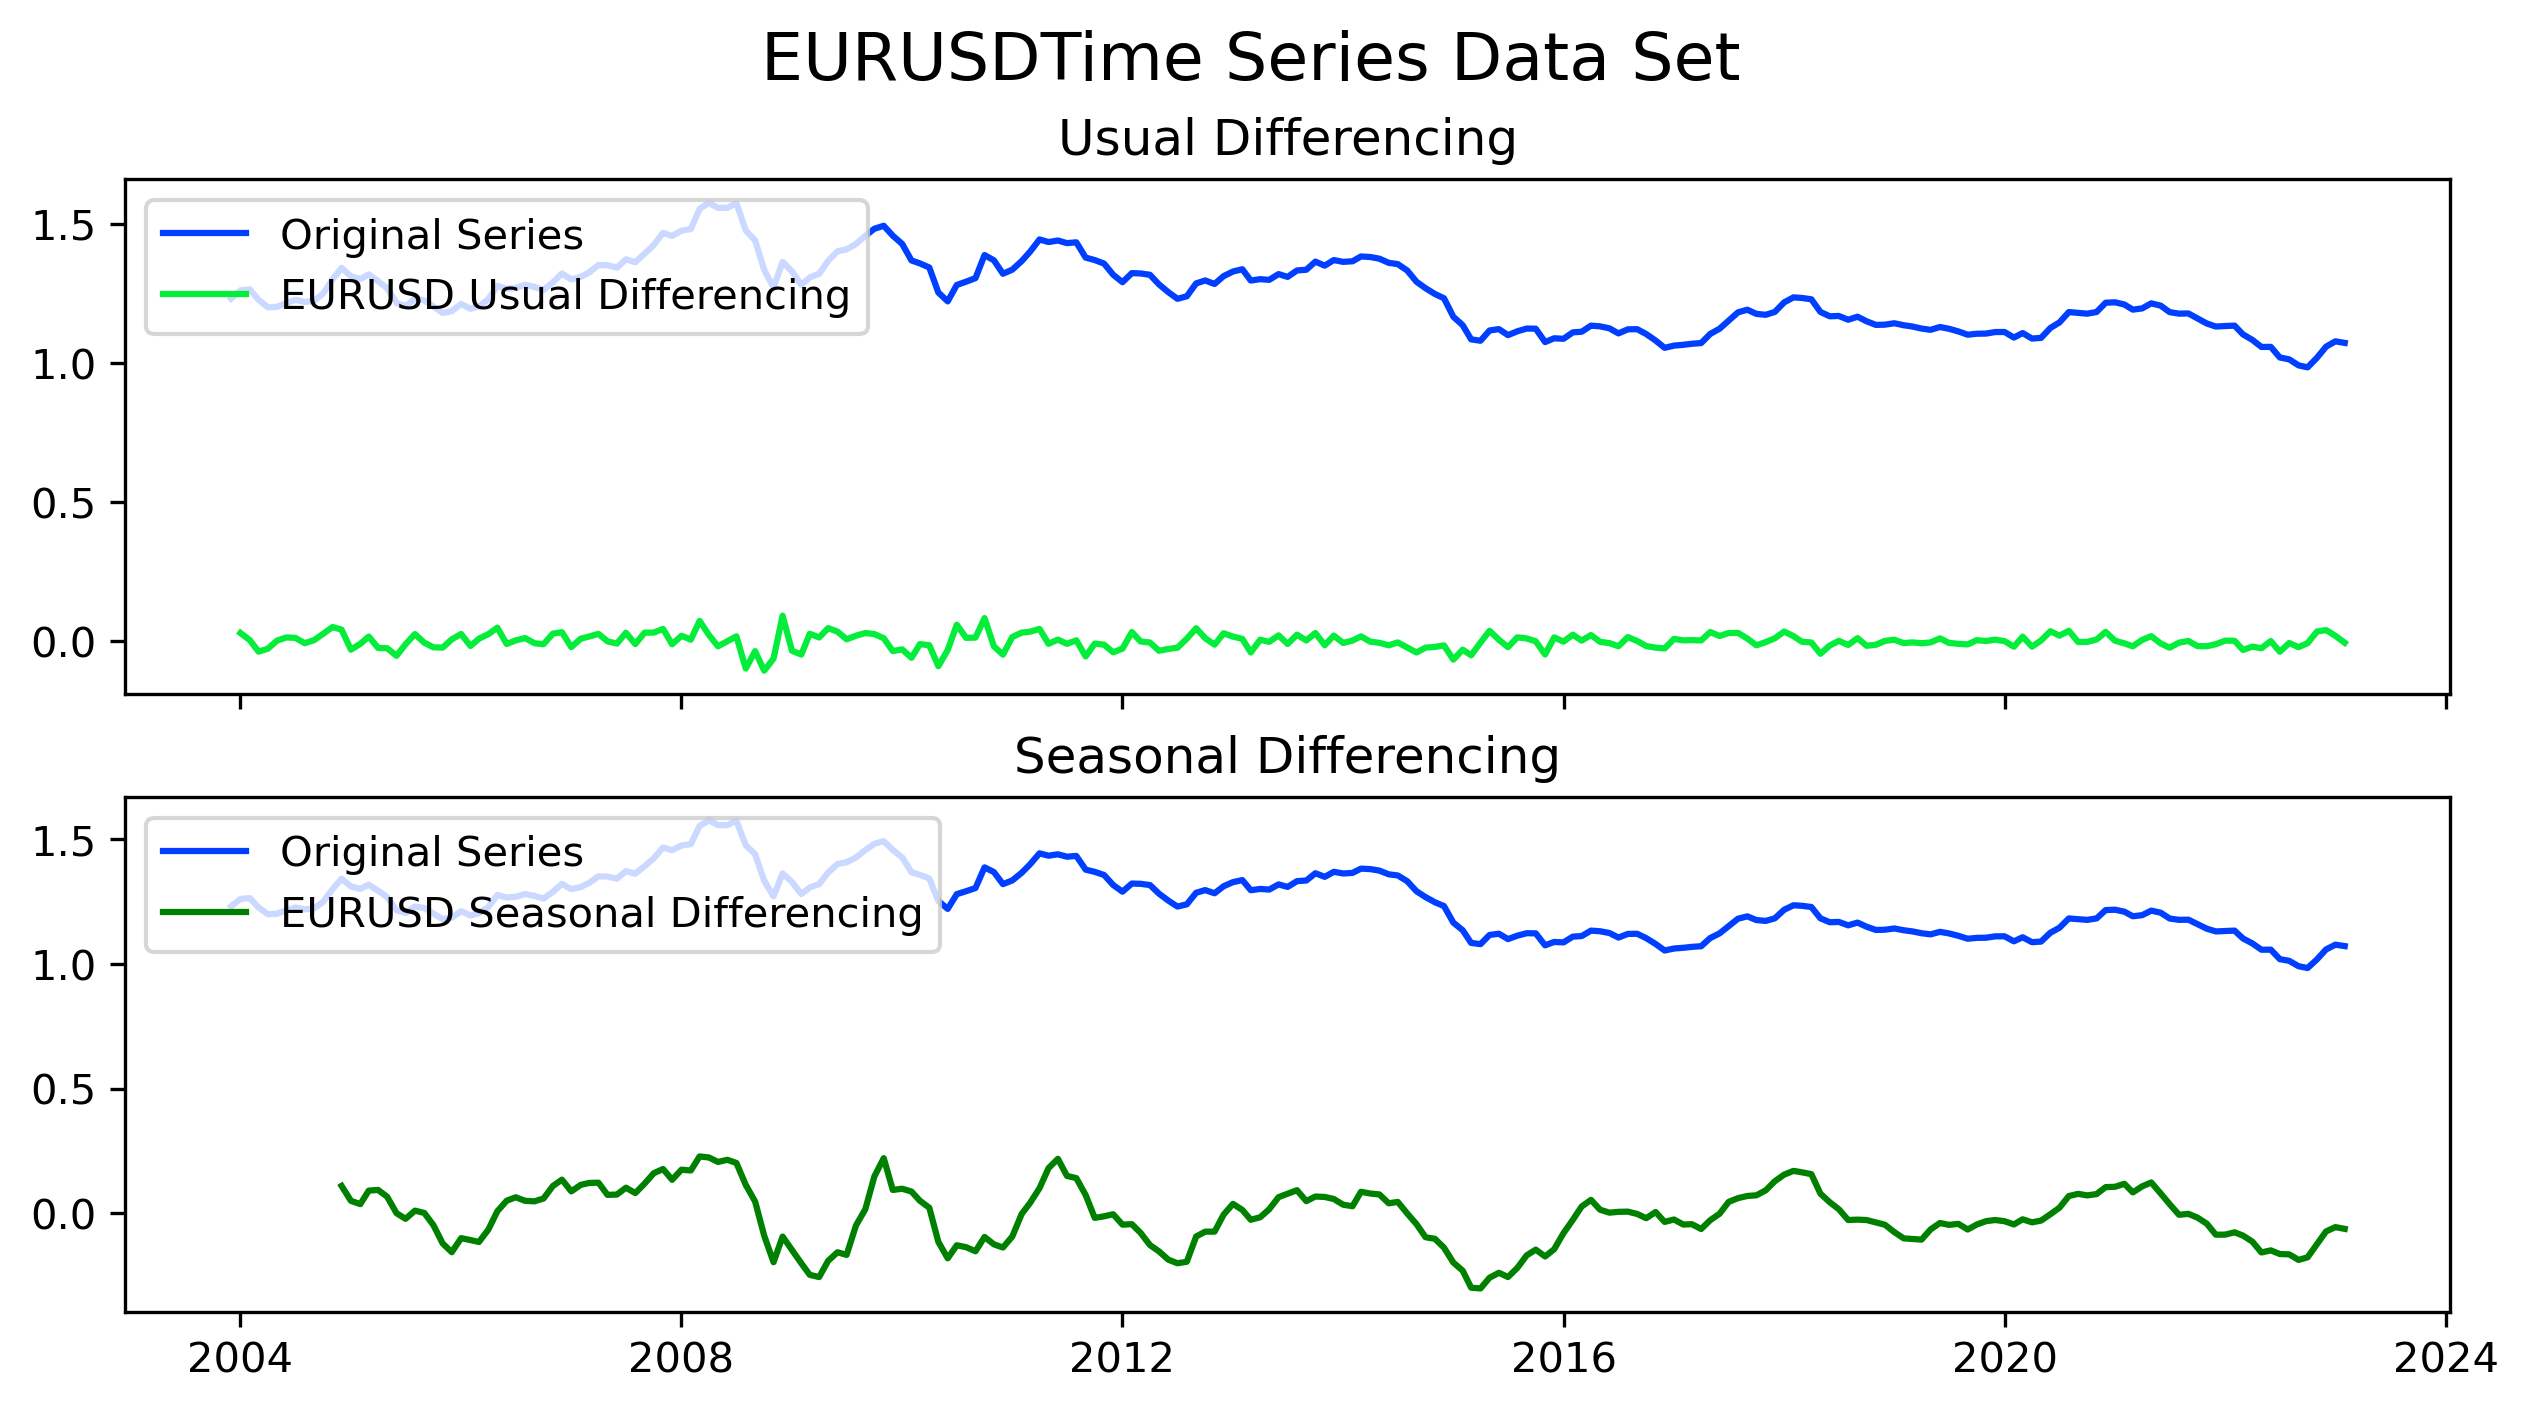

In [1139]:
for df in df_list_forex:
    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=300, sharex=True)

    # Usual Differencing
    axes[0].plot(df[df.columns[0]], label='Original Series')
    axes[0].plot(df[df.columns[0]].diff(1), label=df.columns[0]+' Usual Differencing')
    axes[0].set_title('Usual Differencing')
    axes[0].legend(loc='upper left', fontsize=10)


    # Seasonal Differencing
    axes[1].plot(df[df.columns[0]], label='Original Series')
    axes[1].plot(df[df.columns[0]].diff(12), label=df.columns[0]+' Seasonal Differencing', color='green')
    axes[1].set_title('Seasonal Differencing')
    plt.legend(loc='upper left', fontsize=10)
    plt.suptitle(df.columns[0] + "Time Series Data Set", fontsize=16)
    plt.show()

### ARIMA Model + Graph

======================================JPYUSD=====================================
The best model for JPYUSD is: (1, 1, 0) with AIC: 1272.6619138989618 and BIC: 1279.9099489113364
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  278
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -634.331
Date:                Mon, 20 Mar 2023   AIC                           1272.662
Time:                        21:45:50   BIC                           1279.910
Sample:                    01-01-2000   HQIC                          1275.570
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2618      0.05

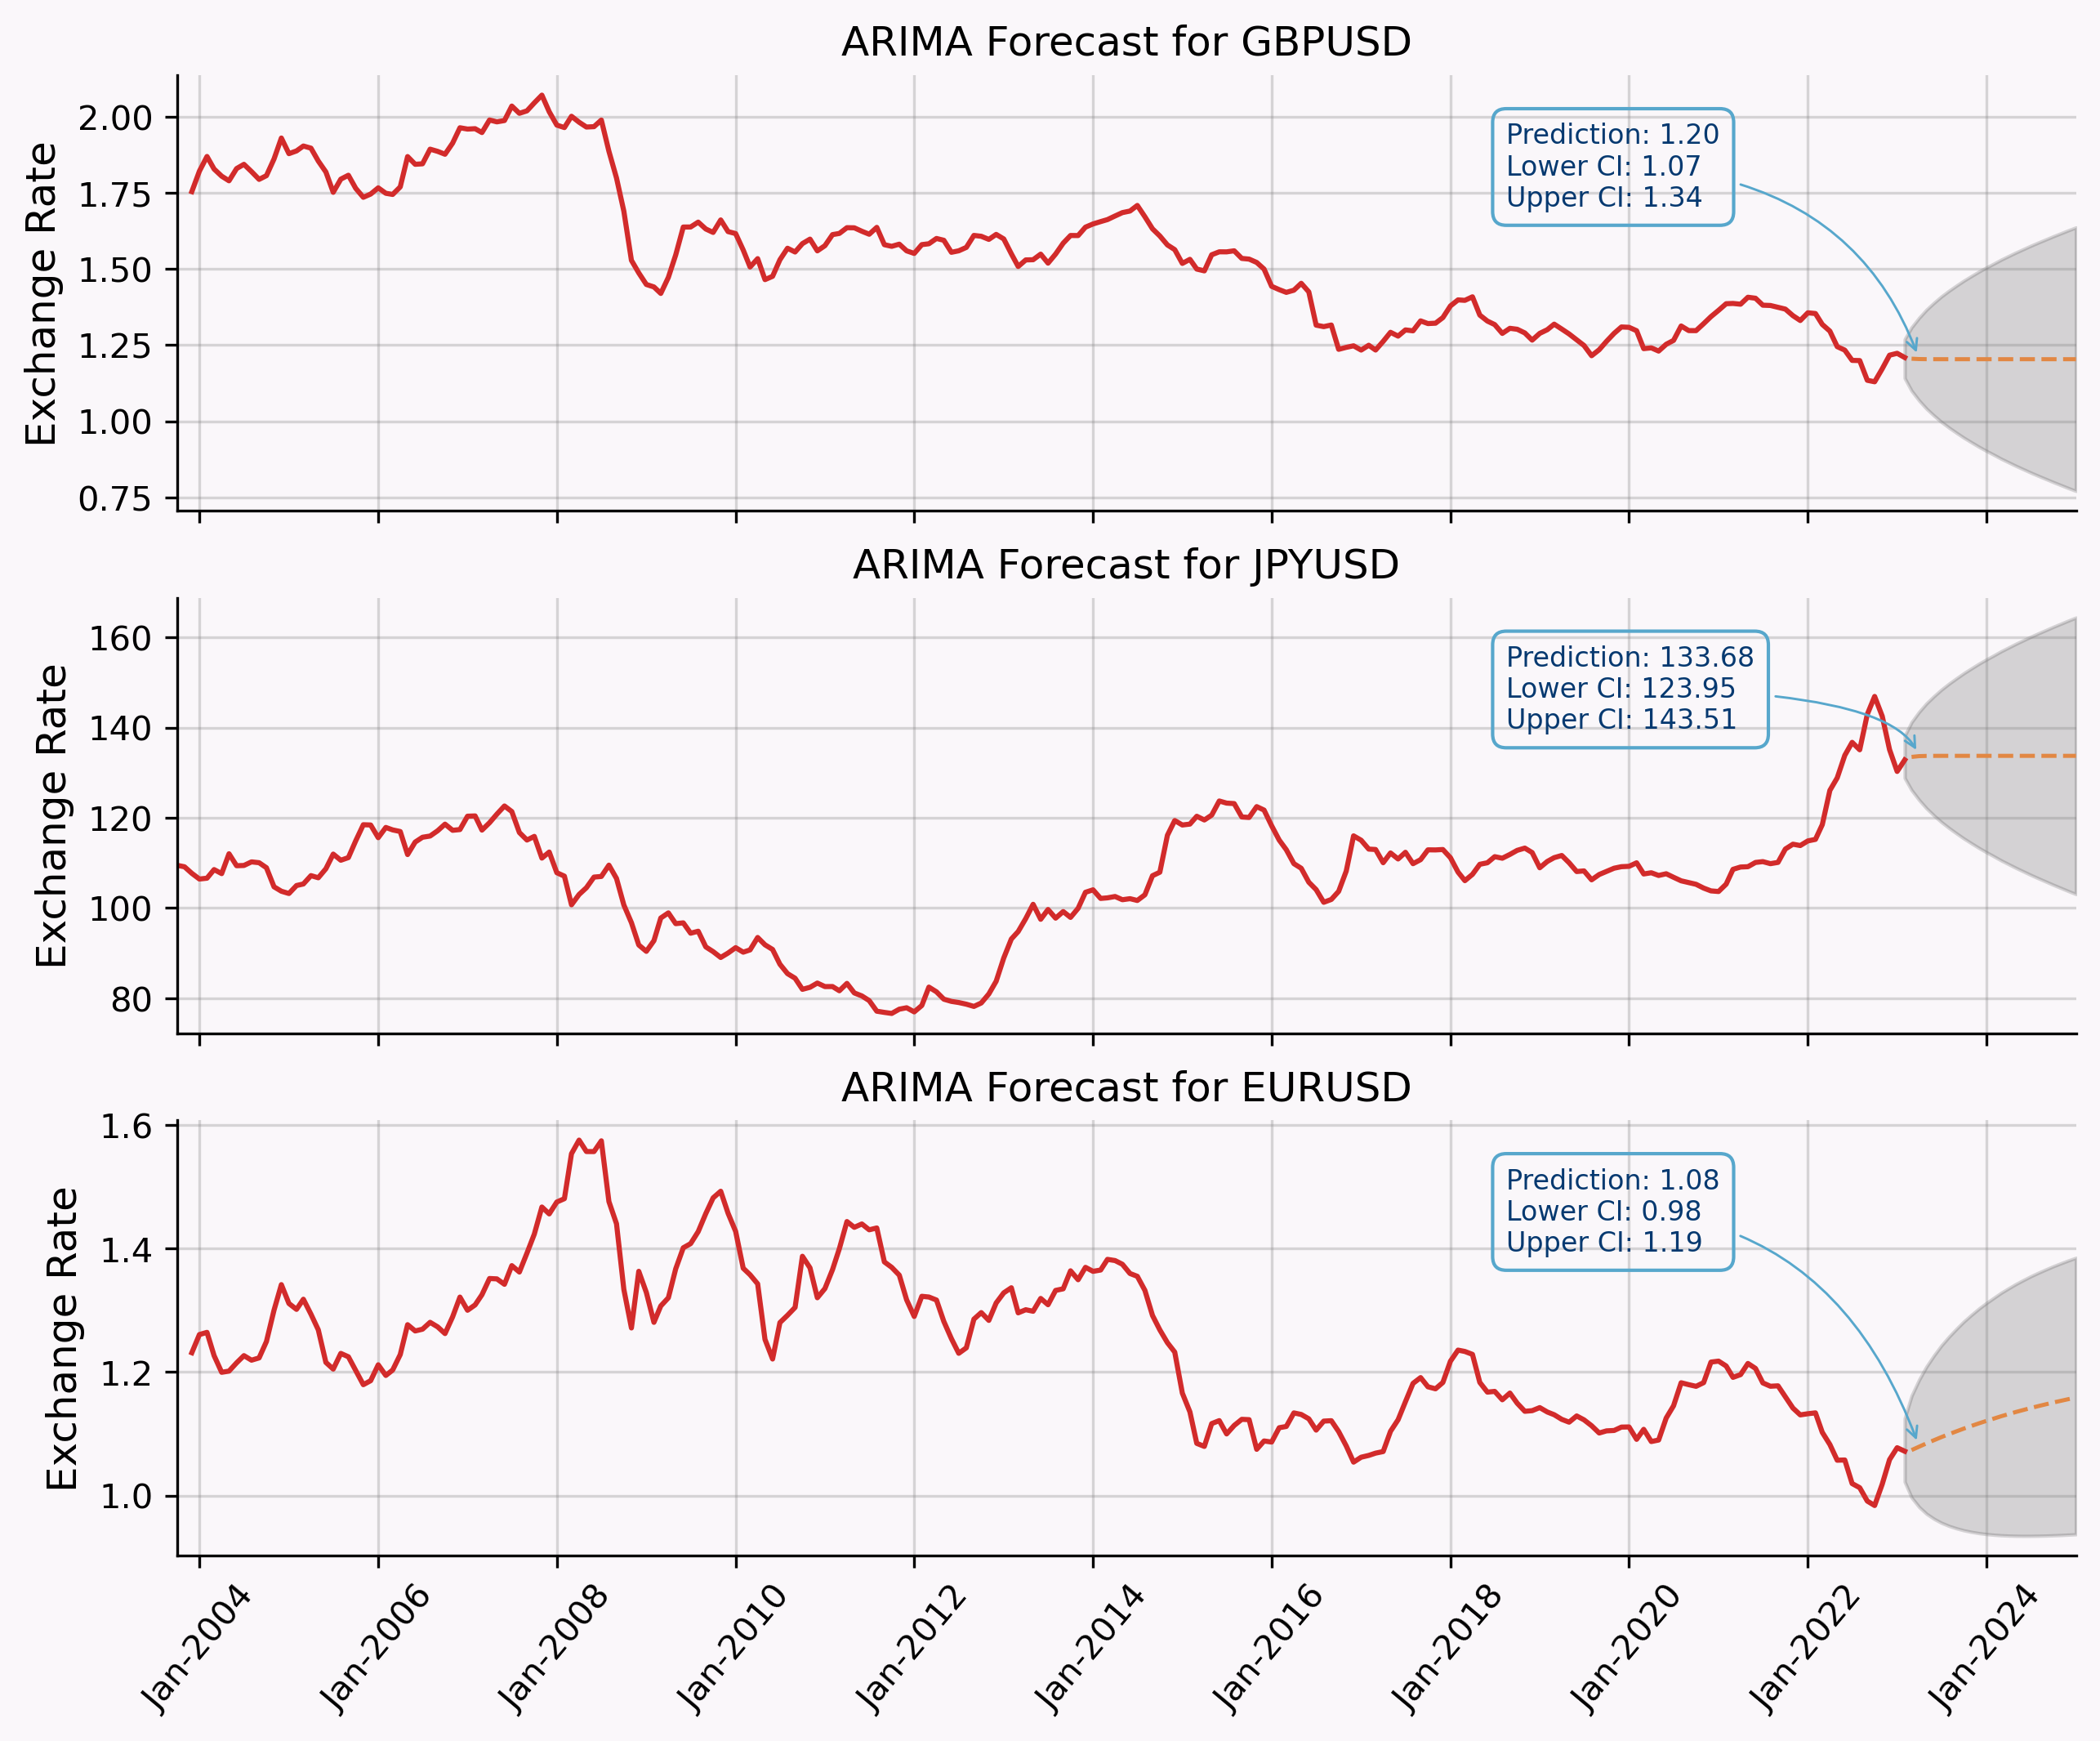

In [1166]:


# create a canvas for 3 forecast plots
fig, axes = plt.subplots(3, 1, figsize=(10,8), sharex=True)

# write a for loop to iterate through the list of dataframes to generate models for each dependent variable
for df in df_list_forex:
    model = pm.auto_arima(df[df.columns[0]], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,    # SARIMA Model 
                      start_P=0, 
                      D=None,               
                      trace=False,
                      error_action='ignore', 
                      suppress_warnings=True, 
                      stepwise=True)
    
    # print the model summary
    print("======================================"+df.columns[0]+"=====================================")
    print( "The best model for "+df.columns[0]+" is: "+str(model.order)+" with AIC: "+str(model.aic())+" and BIC: "+str(model.bic()) )
    print(model.summary())
    print("============================================================================================")
    # leave 5 rows for the next model using next line \n
    print( "\n\n\n\n\n\n" )
    # Forecast
    n_periods = 24 # 6 months
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS') # month start

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    
    colors = ['#57a7cc', '#063970', '#e28743', '#D22B2B', '#C34A36']
    plt.style.use('seaborn-bright')
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300

    if df.columns[0] == 'GBPUSD':
        ax = axes[0]
    elif df.columns[0] == 'JPYUSD':
        ax = axes[1]
    elif df.columns[0] == 'EURUSD':
        ax = axes[2]

    ax.plot(df[df.columns[0]], color=colors[3])
    ax.plot(fc_series, color=colors[2], lw=1.2, ls='--')
    ax.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)
    ax.set_title("ARIMA Forecast for " + df.columns[0])

    # Add these lines after the "ax.set_title("ARIMA Forecast for " + df.columns[0])" line
    target_date = '2023-04-01'
    target_value = fc_series.loc[target_date]
    lower_bound = lower_series.loc[target_date]
    upper_bound = upper_series.loc[target_date]

    # Add a text box with an arrow
    ax.annotate(f"Prediction: {target_value:.2f}\nLower CI: {lower_bound:.2f}\nUpper CI: {upper_bound:.2f}",
                xy=(mdates.datestr2num(target_date), target_value),
                xycoords='data',
                xytext=(0.7, 0.7),
                textcoords="axes fraction",
                arrowprops=dict(color=colors[0], arrowstyle="->", lw=0.7, connectionstyle="angle3,angleA=0,angleB=110"),
                fontsize=8,
                color=colors[1],
                bbox=dict(facecolor="none", edgecolor=colors[0], boxstyle="round,pad=0.5"))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Exchange Rate', size='large')

# add a grid to each subplot
for ax in axes.flat:
    ax.grid(color="grey", alpha=0.3)

background = tuple(np.array([250, 247, 250]) / 255)
blue = tuple(np.array([20, 64, 134]) / 255)
pink = tuple(np.array([220, 80, 148]) / 255)

# change the color of each subplot
for ax in axes.flat:
    ax.set_facecolor(background)

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.tick_params(axis="x", labelrotation= 50)
# set x axis to start at 2002 and ends at 2025
ax.set_xlim(datetime.datetime(2003, 10, 1), datetime.datetime(2025, 1, 1))

# change the background color
fig.set_facecolor(background)
plt.show()

# save the figure
fig.savefig('ARIMA_currency_forecast.png', facecolor=fig.get_facecolor(), edgecolor='none')


## ARIMAX Model for currency

Now, we will force an external predictor, also called, exogenous variable into the model. This model is called the SARIMAX model. The only requirement to use an exogenous variable is we should know the value of the variable during the forecast period as well.

I want to see how the model looks if we force the recent seasonality pattern into the training and forecast. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

### Cleaning & Merging to create exogenous vars

In [1141]:
df_exo = functools.reduce(lambda left,right: pd.merge(left,right,on='date'), df_list_dv)
df_exo

UMCSENT     date  trade_bal       DFF      GDPC1
0      112.0  2000-01   -27131.0  5.448387  12935.252
1      111.3  2000-02   -29794.0  5.734828  12935.252
2      107.1  2000-03   -30557.0  5.853548  12935.252
3      109.2  2000-04   -28598.0  6.019667  13170.749
4      110.7  2000-05   -29165.0  6.268065  13170.749
..       ...      ...        ...       ...        ...
272     58.6  2022-09   -72638.0  2.555000  20054.663
273     59.9  2022-10   -77161.0  3.080000  20187.495
274     56.8  2022-11   -60646.0  3.780000  20187.495
275     59.7  2022-12   -67210.0  4.104194  20187.495
276     64.9  2023-01   -68289.0  4.330000  20187.495

[277 rows x 5 columns]

In [1144]:
import functools

# first, merge all dataframes in df_list_dv into one dataframe on date
df_exo = functools.reduce(lambda left,right: pd.merge(left,right,on='date'), df_list_dv)

# df_gbp, df_jpy, df_eur reset index
df_gbp = df_gbp.reset_index()
df_jpy = df_jpy.reset_index()
df_eu = df_eu.reset_index()

# get rid of the day in date, just keep yyyy-mm in df_gbp, df_jpy, df_eur
df_gbp['date'] = df_gbp['date'].dt.strftime('%Y-%m')
df_jpy['date'] = df_jpy['date'].dt.strftime('%Y-%m')
df_eu['date'] = df_eu['date'].dt.strftime('%Y-%m')


# merge each of df_gbp, df_jpy, df_eur with df_exo
df_gbp_exo = pd.merge(df_gbp, df_exo, on='date')
df_jpy_exo = pd.merge(df_jpy, df_exo, on='date')
df_eu_exo = pd.merge(df_eu, df_exo, on='date')

# group by daye and GBPUSD, JPYUSD, EURUSD
df_gbp_exo = df_gbp_exo.groupby(['date', 'GBPUSD']).mean().reset_index().set_index('date')
df_jpy_exo = df_jpy_exo.groupby(['date', 'JPYUSD']).mean().reset_index().set_index('date')
df_eu_exo = df_eu_exo.groupby(['date', 'EURUSD']).mean().reset_index().set_index('date')

# df_list_exo
df_list_exo = [df_gbp_exo, df_jpy_exo, df_eu_exo]

### ARIMAX Model

In [1145]:
exog_vars = list(df_gbp_exo.columns)
exog_vars.remove(df_gbp_exo.columns[0])
exog_vars
exog = {df_gbp_exo.columns[0]: df_gbp_exo[exog_vars]}
exog
df_jpy_exo

JPYUSD  UMCSENT  trade_bal       DFF      GDPC1
date                                                        
2000-01  105.260000    112.0   -27131.0  5.448387  12935.252
2000-02  109.451429    111.3   -29794.0  5.734828  12935.252
2000-03  106.342174    107.1   -30557.0  5.853548  12935.252
2000-04  105.641000    109.2   -28598.0  6.019667  13170.749
2000-05  108.126522    110.7   -29165.0  6.268065  13170.749
...             ...      ...        ...       ...        ...
2022-09  142.953546     58.6   -72638.0  2.555000  20054.663
2022-10  146.922903     59.9   -77161.0  3.080000  20187.495
2022-11  142.543545     56.8   -60646.0  3.780000  20187.495
2022-12  135.123181     59.7   -67210.0  4.104194  20187.495
2023-01  130.286501     64.9   -68289.0  4.330000  20187.495

[277 rows x 5 columns]

In [1146]:
# reset index for every dataframe in df_list_exo
for df in df_list_exo:
    df.reset_index(inplace=True)

df_list_exo



[        date    GBPUSD  UMCSENT  trade_bal       DFF      GDPC1
 0    2003-12  1.753903     92.6   -44080.0  0.984194  14131.379
 1    2004-01  1.821047    103.8   -44645.0  0.997097  14212.340
 2    2004-02  1.869247     94.4   -44552.0  1.007241  14212.340
 3    2004-03  1.828007     95.8   -46754.0  1.001613  14212.340
 4    2004-04  1.804626     94.2   -47283.0  1.004000  14323.017
 ..       ...       ...      ...        ...       ...        ...
 225  2022-09  1.134704     58.6   -72638.0  2.555000  20054.663
 226  2022-10  1.129808     59.9   -77161.0  3.080000  20187.495
 227  2022-11  1.172473     56.8   -60646.0  3.780000  20187.495
 228  2022-12  1.217089     59.7   -67210.0  4.104194  20187.495
 229  2023-01  1.223238     64.9   -68289.0  4.330000  20187.495
 
 [230 rows x 6 columns],
         date      JPYUSD  UMCSENT  trade_bal       DFF      GDPC1
 0    2000-01  105.260000    112.0   -27131.0  5.448387  12935.252
 1    2000-02  109.451429    111.3   -29794.0  5.734828  12

In [1147]:
# move the second column to the first column
for df in df_list_exo:
    df.insert(0, df.columns[1], df.pop(df.columns[1]))
    


In [1148]:
# set the date column as index
for df in df_list_exo:
    df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)

======================================GBPUSD=====================================
The best model for GBPUSD is: (1, 1, 0) with AIC: -913.4391577559244 and BIC: -906.5717137488159
                               SARIMAX Results                                
Dep. Variable:                 GBPUSD   No. Observations:                  230
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 462.989
Date:                Mon, 20 Mar 2023   AIC                           -913.978
Time:                        21:46:40   BIC                           -893.376
Sample:                    12-01-2003   HQIC                          -905.667
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UMCSENT    -8.693e-05      0.00

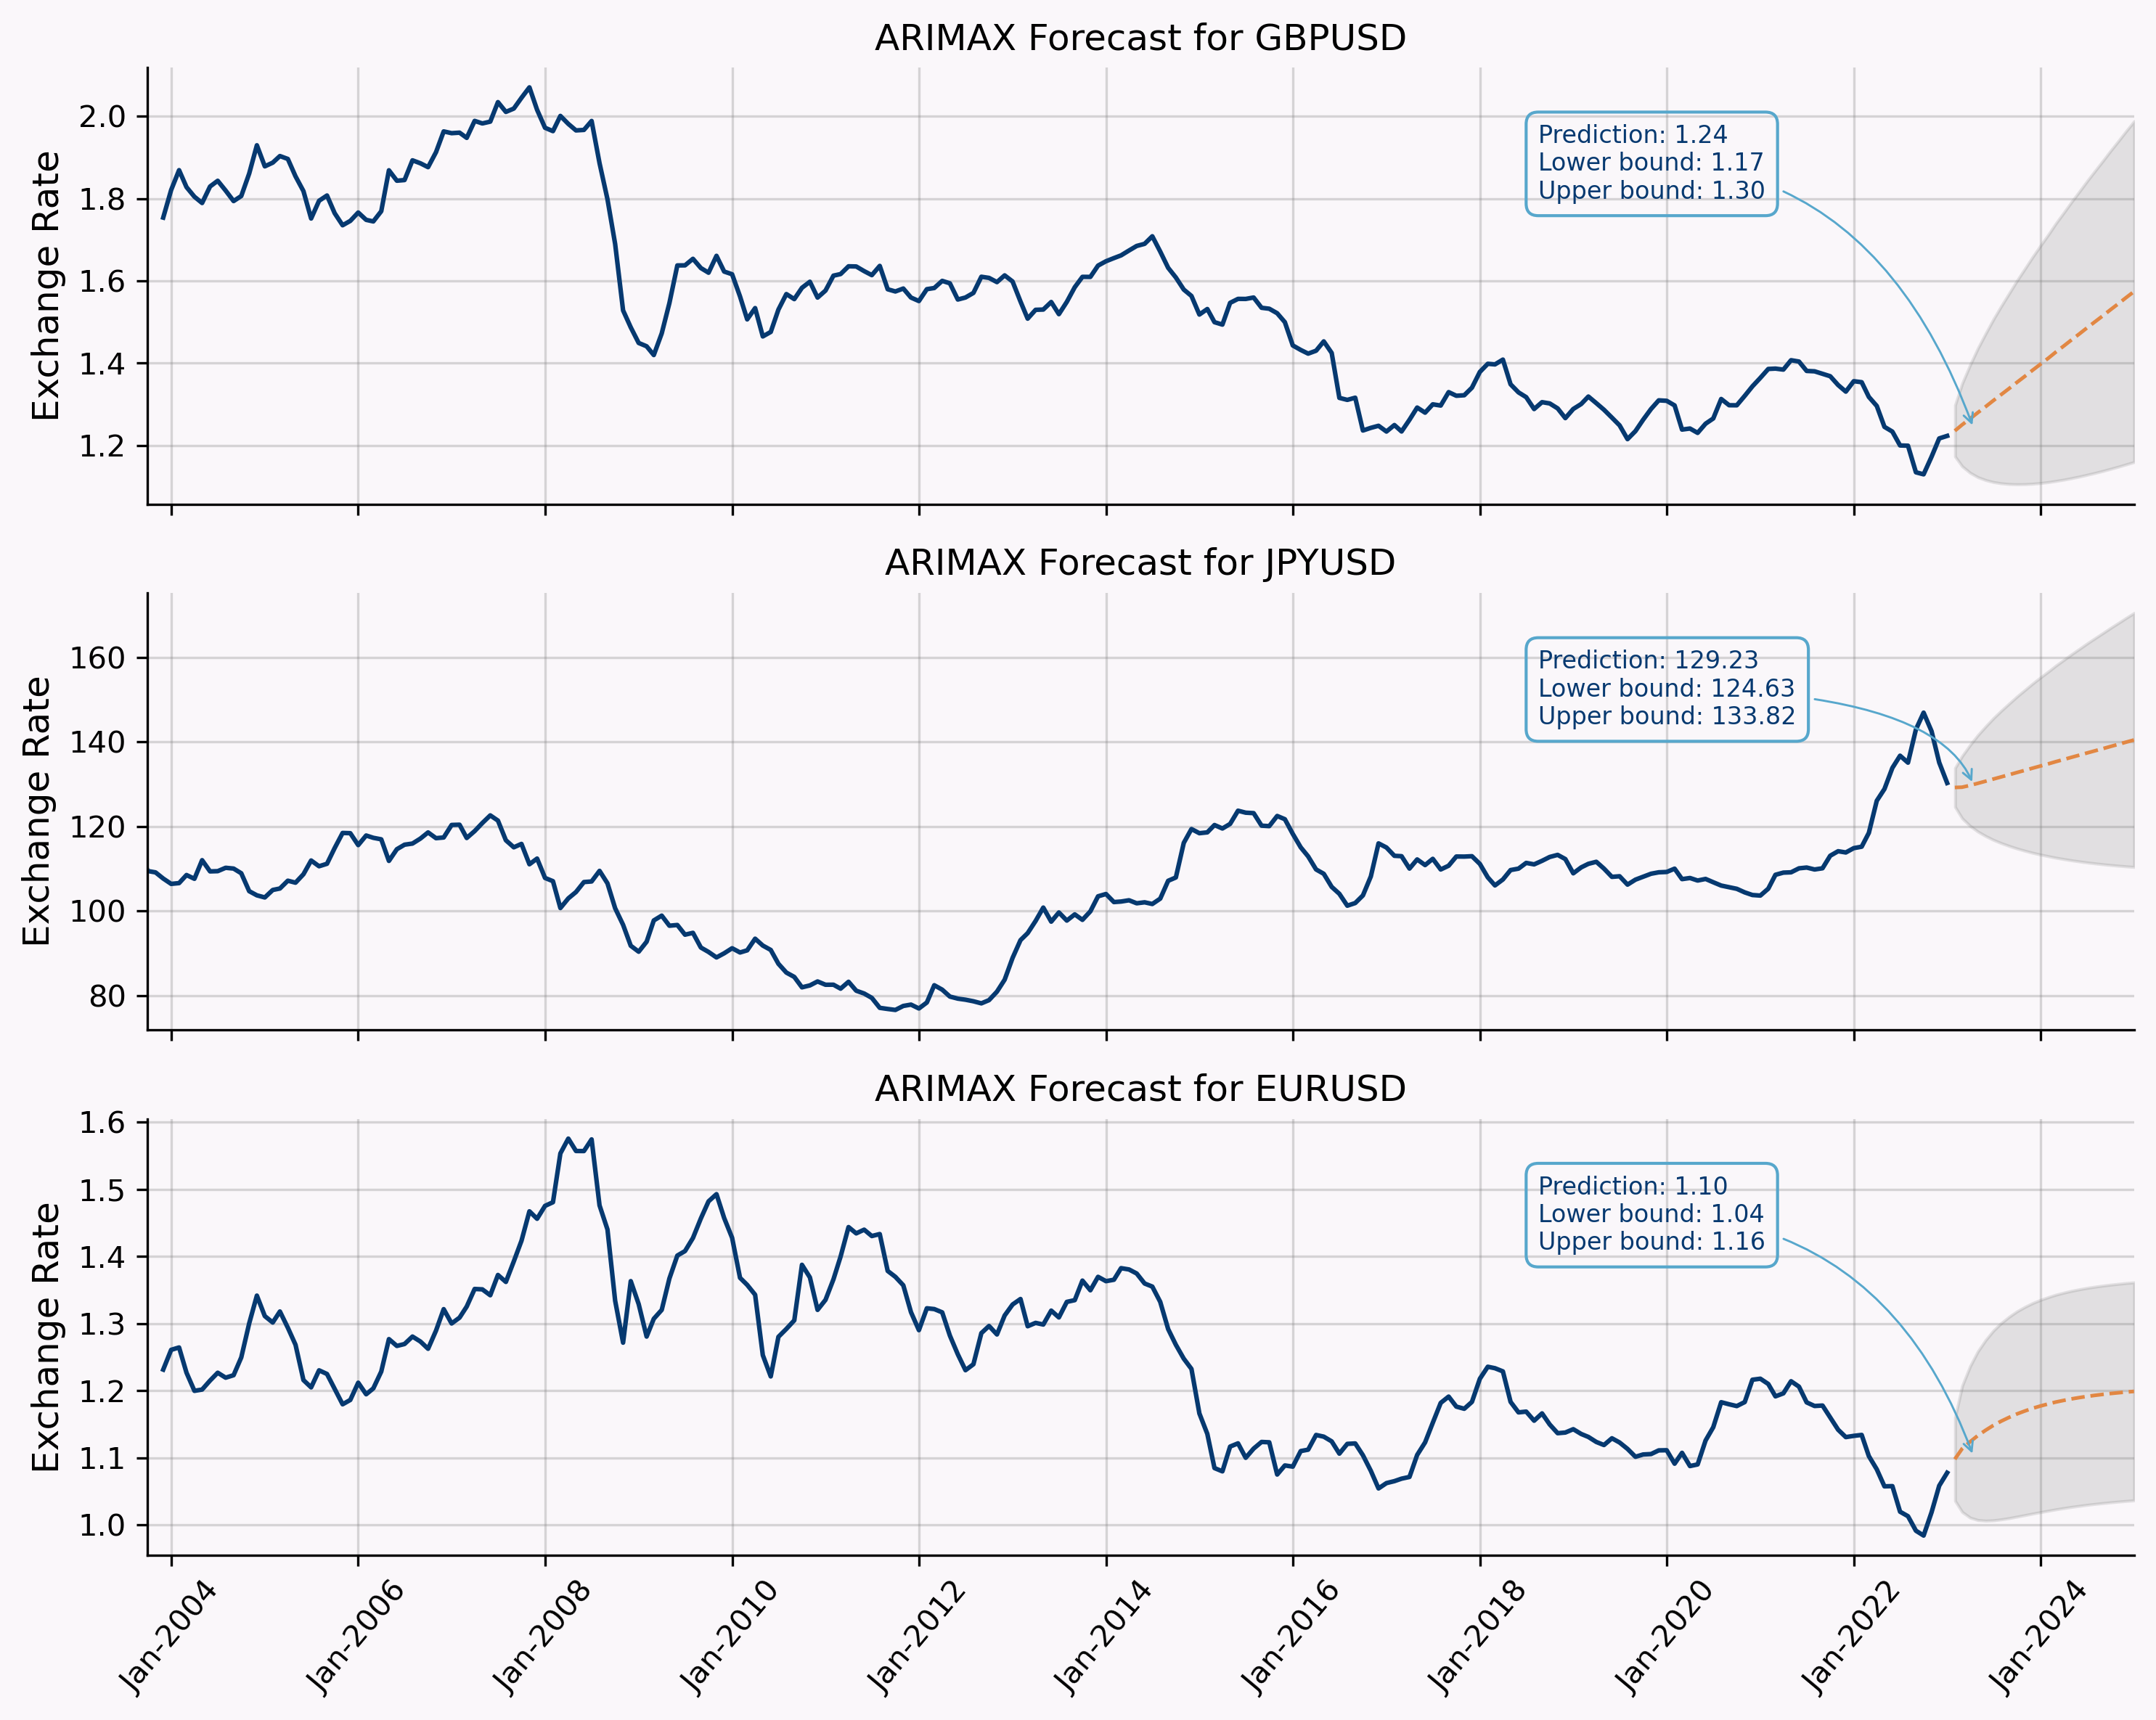

In [1167]:

# create a canvas for 3 forecast plots
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Iterate over the dataframes and their corresponding axes
for df, ax in zip(df_list_exo, axes):
    # Fit the ARIMA model with the optimal order and exogenous variables
    sxmodel = pm.auto_arima(df[df.columns[0]], exo=df[["UMCSENT"]],
                            start_p=1, start_q=1,
                            test='adf',       # use adftest to find optimal 'd'
                            max_p=3, max_q=3, # maximum p and q
                            m=12,              # frequency of series
                            d=None,           # let model determine 'd'
                            seasonal=False,    # SARIMA Model 
                            start_P=0, 
                            D=1,               
                            trace=False,
                            error_action='ignore', 
                            suppress_warnings=True, 
                            stepwise=True)

    order = sxmodel.order
    print("======================================"+df.columns[0]+"=====================================")
    print("The best model for "+df.columns[0]+" is: "+str(order)+" with AIC: "+str(sxmodel.aic())+" and BIC: "+str(sxmodel.bic()))
    print("============================================================================================")

    sxmodel = sm.tsa.ARIMA(endog=df[[df.columns[0]]], exog=df[["UMCSENT", "trade_bal", "DFF", "GDPC1"]], order=order)
    # suppress warnings
    

    results = sxmodel.fit()
    print(results.summary())
    print("\n\n\n\n\n\n")

    # Forecast
    n_periods = 24

    # Create a DataFrame with future dates for forecasting
    future_dates = pd.date_range(start=pd.Timestamp(df.index[-1]) + pd.DateOffset(days=1), periods=n_periods, freq='M', closed='right')
    future_exog = df_forecast_dv.iloc[:n_periods]

    # Forecast n_periods into the future using the fitted model and future exogenous data
    fc = results.get_prediction(exog=future_exog, start=len(df), end=len(df) + n_periods - 1, return_conf_int=True)
    pred_ci = fc.conf_int()

    
    colors = ['#57a7cc', '#063970', '#e28743', '#D22B2B', '#C34A36']
    plt.style.use('seaborn-bright')
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    
    ax.grid(color = "grey", alpha = 0.3)
        
    background = tuple(np.array([250, 247, 250]) / 255)
    blue = tuple(np.array([20, 64, 134]) / 255)
    pink = tuple(np.array([220, 80, 148]) / 255)

    # change the color of each subplot
    
    ax.set_facecolor(background)

    # change the background color
    fig.set_facecolor(background)
    # Plot the original data, forecast, and confidence intervals
   
    ax.plot(df.index, df[df.columns[0]], color = colors[1])
    ax.plot(future_dates, fc.predicted_mean, color = colors[2], lw=1.2, ls='--')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1],
                    color='#333333', alpha=.12)
    ax.set_title("ARIMAX Forecast for " + df.columns[0])
    # add a text on upper left corner, using relative coordinates
    x_position = 0.05
    y_position = 0.85
    #ax.text(x_position, y_position, 'confidence interval', transform=ax.transAxes, fontsize=8, color='red')
    
    # Find the index of the April 18th prediction
    april_18th_index = (future_dates == datetime.datetime(2023, 4, 18)).argmax()

    # Store the target prediction, lower bound, and upper bound for April 18th
    target_prediction = fc.predicted_mean[april_18th_index]
    lower_bound = pred_ci.iloc[april_18th_index, 0]
    upper_bound = pred_ci.iloc[april_18th_index, 1]

    # Print the values
    print(f"Target prediction for {df.columns[0]} on April 18th: {target_prediction:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")

    # Add the text to the graph
    ax.annotate(
        f"Prediction: {target_prediction:.2f}\nLower bound: {lower_bound:.2f}\nUpper bound: {upper_bound:.2f}",
        xy=(mdates.date2num(datetime.datetime(2023, 4, 18)), target_prediction),
        xycoords="data",
        xytext=(0.7, 0.7),
        textcoords="axes fraction",
        arrowprops=dict(color=colors[0], arrowstyle="->", lw=0.7, connectionstyle = "angle3,angleA=0,angleB=110"),
        fontsize=8,
        color=colors[1],
        bbox=dict(facecolor="none", edgecolor=colors[0], boxstyle="round,pad=0.5"),
        
    )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Exchange Rate', size='large')

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.tick_params(axis="x", labelrotation= 50)
# set x axis to start at 2002 and ends at 2025
ax.set_xlim(datetime.datetime(2003, 10, 1), datetime.datetime(2025, 1, 1))

# only x and y axis, not box around the plot

# Set the figure layout and display the plots
fig.tight_layout()
plt.show()
# save the figure
fig.savefig('ARIMAX_forecast.png', dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())